# Gaussian Mixture Model by<br/> Expectation-Maximization
![](banner_gmm.jpg)

_<p style="text-align: center;"> Like sand dunes shifting in the wind ... </p>_

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)                       
update_geom_defaults("point", list(size=6, colour="grey50"))

== document setup ==

## Introduction

Motivation, context, history, related topics ...

## Synopsis

**Terms**

* **Gaussian Mixture Model:** A set of Gaussian functions, each one associated with a cluster.
* **Expectation-Maximization:** A method to estimate a Gaussian mixture model.
* **Gaussian Mixtue Model Estimation by Expectation-Maximization** is a cluster model construction method.

## Exposition

### At a Glance

#### Data

x1
2.0
2.5
4.0
6.5
8.0
9.0
10.0
10.5


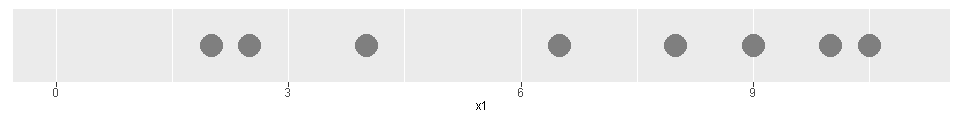

In [2]:
data = data.frame(x1=c(2.0, 2.5, 4.0, 6.5, 8.0, 9.0, 10.0, 10.5))
data

output_size(8,1)
ggplot(data) + geom_point(aes(x=x1, y=0)) + xlim(0,11) + theme.x_axis_only
output_size(restore)

#### Initialize

Each cluster is associated with its own Gaussian function defined by a size, mean, and standard deviation.

In [3]:
size.A = 0.5; mean.A = 9;  sd.A = 1
size.B = 0.5; mean.B = 10; sd.B = 1

data.frame(cluster=c("A","B"), size=c(size.A, size.B), mean=c(mean.A, mean.B), sd=c(sd.A, sd.B)) %>% caption("Initialization", position="left")

cluster,size,mean,sd
A,0.5,9,1
B,0.5,10,1


#### Update Partial Cluster Assignments

Each observation is partially assigned to both clusters according to the value of a Gaussian function at that observation relative to those for other observations. 

x1,g.A,g.B,weight.A,weight.B
2.0,0.00000000000456736,2.526136e-15,0.9994472,0.0005527786
2.5,0.00000000013347783,1.217160e-13,0.9990889,0.0009110512
4.0,0.00000074335975737,3.037941e-09,0.9959299,0.0040701377
6.5,0.00876415024678427,4.363413e-04,0.9525741,0.0474258732
8.0,0.12098536225957168,2.699548e-02,0.8175745,0.1824255238
9.0,0.19947114020071635,1.209854e-01,0.6224593,0.3775406688
10.0,0.12098536225957168,1.994711e-01,0.3775407,0.6224593312
10.5,0.06475879783294587,1.760327e-01,0.2689414,0.7310585786


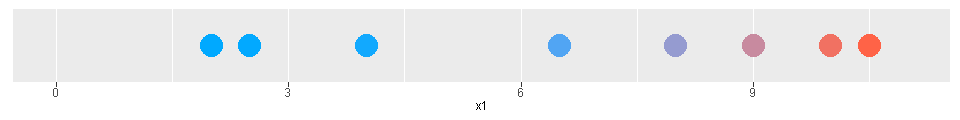

In [4]:
data$g.A = gaussian(data$x1, mean.A, sd.A, size=size.A)
data$g.B = gaussian(data$x1, mean.B, sd.B, size=size.B)          
data$weight.A = data$g.A / (data$g.A + data$g.B)
data$weight.B = data$g.B / (data$g.A + data$g.B)
data

output_size(8,1)
ggplot(data) + xlim(0,11) + geom_point(aes(x=x1, y=0, color=weight.A)) +
scale_color_gradient(high=PALETTE[1], low=PALETTE[2]) +
theme.x_axis_only + theme.no_legend
output_size(restore)

#### Update Gaussian Functions

To find more satisfactory Gaussian functions, adjust the Gaussian functions according to the partial cluster assignments.

cluster,size,mean,sd
A,0.5139692,3.895460,1.9201458
B,0.4860308,9.382849,0.9993262


x1,g.A,g.B,weight.A,weight.B
2.0,0.0656014191,0.0000000000002728804,1.000000000,0.000000000004159672
2.5,0.0820019650,0.0000000000097037649,1.000000000,0.000000000118335760
4.0,0.1066275164,0.0000000971680869243,0.999999089,0.000000911284457027
6.5,0.0425582941,0.0030252467726058926,0.933632914,0.066367085949616142
8.0,0.0108711898,0.0744838305723369981,0.127364386,0.872635613601134508
9.0,0.0031181640,0.1802999800777327355,0.017000303,0.982999697091273994
10.0,0.0006819127,0.1603426248640237028,0.004234837,0.995765162577665008
10.5,0.0002880525,0.1038712856450726973,0.002765499,0.997234501005452856


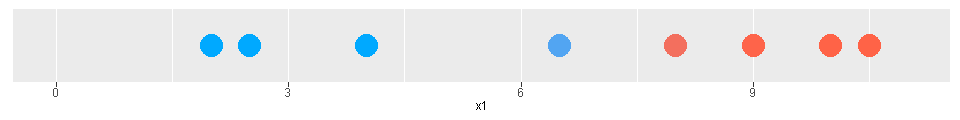

In [5]:
n = 20
for (i in 1:n)   { size.A = sum(data$weight.A) / sum(c(data$weight.A, data$weight.B)) 
                   mean.A = weighted.mean(data$x1, data$weight.A)
                   sd.A = sqrt(sum(data$weight.A * (data$x1 - mean.A)^2) / sum(data$weight.A))
                   size.B = sum(data$weight.B) / sum(c(data$weight.A, data$weight.B))
                   mean.B = weighted.mean(data$x1, data$weight.B)
                   sd.B = sqrt(sum(data$weight.B * (data$x1 - mean.B)^2) / sum(data$weight.B))

                   data$g.A = gaussian(data$x1, mean.A, sd.A, size=size.A)
                   data$g.B = gaussian(data$x1, mean.B, sd.B, size=size.B)
                   data$weight.A = data$g.A / (data$g.A + data$g.B)
                   data$weight.B = data$g.B / (data$g.A + data$g.B) }                                 

data.frame(cluster=c("A","B"), size=c(size.A, size.B), mean=c(mean.A, mean.B), sd=c(sd.A, sd.B))
data
                        
output_size(8,1)
ggplot(data) + xlim(0,11) + geom_point(aes(x=x1, y=0, color=weight.A), size=6) +
scale_color_gradient(high=PALETTE[1], low=PALETTE[2]) + theme.x_axis_only + theme.no_legend    
output_size(restore)

#### Commit Cluster Assignments

Assign each observation to the cluster for which it has that highest cluster assignment weight.

x1,g.A,g.B,weight.A,weight.B,cluster
2.0,0.0656014191,0.0000000000002728804,1.000000000,0.000000000004159672,A
2.5,0.0820019650,0.0000000000097037649,1.000000000,0.000000000118335760,A
4.0,0.1066275164,0.0000000971680869243,0.999999089,0.000000911284457027,A
6.5,0.0425582941,0.0030252467726058926,0.933632914,0.066367085949616142,A
8.0,0.0108711898,0.0744838305723369981,0.127364386,0.872635613601134508,B
9.0,0.0031181640,0.1802999800777327355,0.017000303,0.982999697091273994,B
10.0,0.0006819127,0.1603426248640237028,0.004234837,0.995765162577665008,B
10.5,0.0002880525,0.1038712856450726973,0.002765499,0.997234501005452856,B


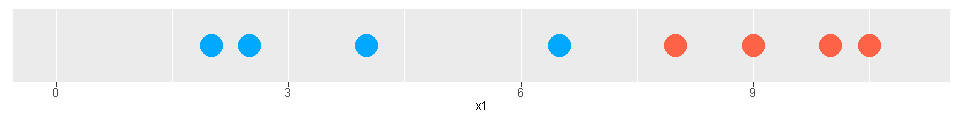

In [6]:
data$cluster = factor(data$weight.A < data$weight.B, labels=c("A","B"))
data

output_size(8,1)                
ggplot(data) + xlim(0,11) + geom_point(aes(x=x1, y=0, color=cluster), size=6) +
theme.x_axis_only + theme.no_legend
output_size(restore)

### Expectation-Maximization for One Variable, Two Clusters 

#### Expectation Step

Update weights (partial cluster assignments) like this:

$ \text{For class} \, A \text{:} \quad w_{Ai} = \large\frac{g_A(x_i)}{g_A(x_i) \, + \, g_B(x_i)} $

$ \text{For class} \, B \text{:} \quad w_{Bi} = \large\frac{g_B(x_i)}{g_A(x_i) \, + \, g_B(x_i)} $

where ...
* $w_{Ai}$ is the weight of the $i^{th}$ observation, with respect to class $A$
* $w_{Bi}$ is the weight of the $i^{th}$ observation, with respect to class $B$
* $x$ is the distribution of observation values and $x_i$ is the $i^{th}$ value
* $g_A$ is the Gaussian function for class $A$
* $g_B$ is the Gaussian function for class $B$

#### Maximization Step

Update sizes, means, and standard deviations of the Guassian functions like this:

$ \text{For class} \, A \text{:} \quad 
s_A = \large\frac{\sum_{i=1}^n{w_{Ai}}}{\sum_{i=1}^n{w_{Ai}}\sum_{i=1}^n{w_{Bi}}}\normalsize
\quad\quad
\mu_A = \large\frac{\sum_{i=1}^n{w_{Ai} x_i}}{\sum_{i=1}^n{w_{Ai}}}\normalsize
\quad\quad
\sigma_A = \large\sqrt{\frac{\sum_{i=1}^n{w_{Ai} (x_i-{\mu_A})^2}}{\sum_{i=1}^n{w_{Ai}}}}\normalsize
$

$ \text{For class} \, B \text{:} \quad 
s_B = \large\frac{\sum_{i=1}^n{w_{Bi}}}{\sum_{i=1}^n{w_{Ai}}\sum_{i=1}^n{w_{Bi}}}\normalsize
\quad\quad
\mu_B = \large\frac{\sum_{i=1}^n{w_{Bi} x_i}}{\sum_{i=1}^n{w_{Bi}}}\normalsize
\quad\quad
\sigma_B = \large\sqrt{\frac{\sum_{i=1}^n{w_{Bi} (x_i-{\mu_B})^2}}{\sum_{i=1}^n{w_{Bi}}}}\normalsize
$

where ...
* $s_A$ is the size of the new gaussian function for class $A$
* $s_B$ is the size of the new gaussian function for class $B$
* $\mu_A$ is the mean of the new gaussian function for class $A$
* $\mu_B$ is the mean of the new gaussian function for class $B$
* $\sigma_A$ is the standard deviation of the new gaussian function for class $A$
* $\sigma_B$ is the standard deviation of the new gaussian function for class $B$
* $x$ is the distribution of observation values and $x_i$ is the $i^{th}$ value
* $w_{Ai}$ is the weight (partial assignment) of the $i^{th}$ observation to class $A$
* $w_{Bi}$ is the weight (partial assignment) of the $i^{th}$ observation to class $B$
* $n$ is the number of observations

### Example: One Variable, Two Clusters

#### Data

x1
2.0
2.5
4.0
6.5
8.0
9.0
10.0
10.5


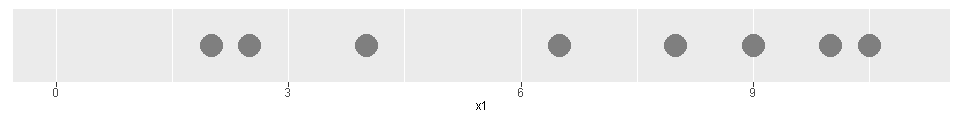

In [7]:
data = data.frame(x1=c(2.0, 2.5, 4.0, 6.5, 8.0, 9.0, 10.0, 10.5))
data

output_size(8,1)
ggplot(data) + xlim(0,11) + geom_point(aes(x=x1, y=0)) + theme.x_axis_only
output_size(restore)

#### Initialize

cluster,size,mean,sd
A,0.5,9,1
B,0.5,10,1


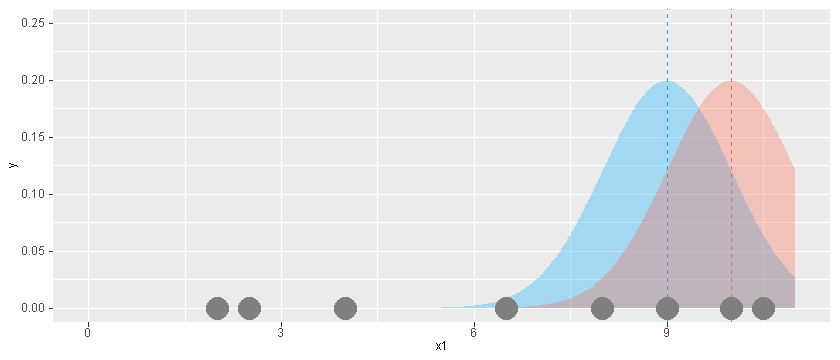

In [8]:
size.A = 0.5; mean.A = 9;  sd.A = 1
size.B = 0.5; mean.B = 10; sd.B = 1

data.frame(cluster=c("A","B"), size=c(size.A, size.B), mean=c(mean.A, mean.B), sd=c(sd.A, sd.B)) %>% caption("Initialization", position="left")

ggplot(data) + xlim(0,11) + ylim(0,0.25) +
geom_vline(aes(xintercept=mean.A), color=PALETTE[1], lty="dashed") +
geom_vline(aes(xintercept=mean.B), color=PALETTE[2], lty="dashed") +
stat_function(fun=gaussian, args=c(mean=mean.A, sd=sd.A, size=size.A), n=500, geom="area", fill=PALETTE[1], alpha=0.3) +
stat_function(fun=gaussian, args=c(mean=mean.B, sd=sd.B, size=size.B), n=500, geom="area", fill=PALETTE[2], alpha=0.3) +
geom_point(aes(x=x1, y=0))

x1,g.A,g.B,weight.A,weight.B
8,0.1209854,0.02699548,0.8175745,0.1824255


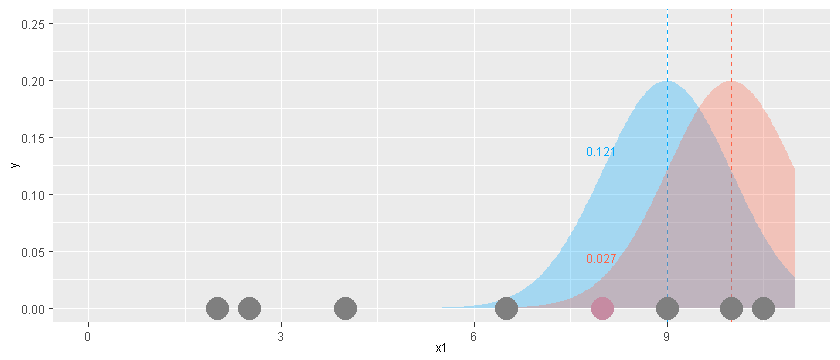

In [9]:
g.A = gaussian(8, mean.A, sd.A, size=size.A)
g.B = gaussian(8, mean.B, sd.B, size=size.B)              
weight.A = g.A / (g.A + g.B)
weight.B = g.B / (g.A + g.B)

data.frame(x1=8, g.A, g.B, weight.A, weight.B)

ggplot(data) + xlim(0,11) + ylim(0,0.25) +
geom_vline(aes(xintercept=mean.A), color=PALETTE[1], lty="dashed") +
geom_vline(aes(xintercept=mean.B), color=PALETTE[2], lty="dashed") +
stat_function(fun=gaussian, args=c(mean=mean.A, sd=sd.A, size=size.A), n=500, geom="area", fill=PALETTE[1], alpha=0.3) +
stat_function(fun=gaussian, args=c(mean=mean.B, sd=sd.B, size=size.B), n=500, geom="area", fill=PALETTE[2], alpha=0.3) +
geom_point(aes(x=x1, y=0)) +
geom_point(aes(x=8, y=0, color=weight.A)) +
geom_text(aes(x=8, y=g.A, label=sprintf("%0.3f", g.A)), color=PALETTE[1]) +
geom_text(aes(x=8, y=g.B, label=sprintf("%0.3f", g.B)), color=PALETTE[2]) +
scale_color_gradient(high=PALETTE[1], low=PALETTE[2]) +
theme.no_legend

x1,g.A,g.B,weight.A,weight.B
2.0,0.00000000000456736,2.526136e-15,0.9994472,0.0005527786
2.5,0.00000000013347783,1.217160e-13,0.9990889,0.0009110512
4.0,0.00000074335975737,3.037941e-09,0.9959299,0.0040701377
6.5,0.00876415024678427,4.363413e-04,0.9525741,0.0474258732
8.0,0.12098536225957168,2.699548e-02,0.8175745,0.1824255238
9.0,0.19947114020071635,1.209854e-01,0.6224593,0.3775406688
10.0,0.12098536225957168,1.994711e-01,0.3775407,0.6224593312
10.5,0.06475879783294587,1.760327e-01,0.2689414,0.7310585786


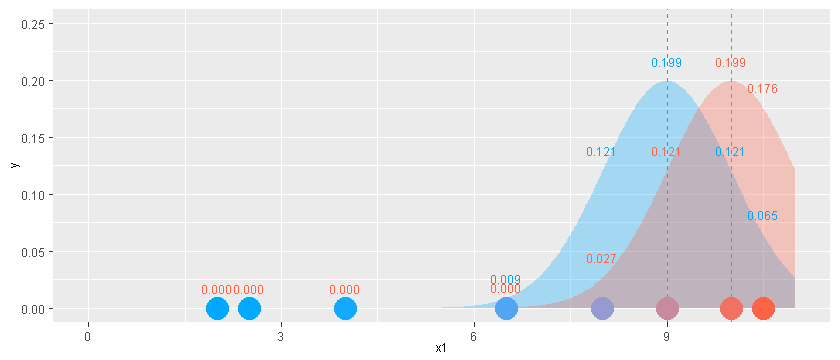

In [10]:
data$g.A = gaussian(data$x1, mean.A, sd.A, size=size.A)
data$g.B = gaussian(data$x1, mean.B, sd.B, size=size.B)          
data$weight.A = data$g.A / (data$g.A + data$g.B)
data$weight.B = data$g.B / (data$g.A + data$g.B)
data                                                    

ggplot(data) + xlim(0,11) + ylim(0,0.25) +
geom_vline(aes(xintercept=mean.A), color=PALETTE[1], lty="dashed") +
geom_vline(aes(xintercept=mean.B), color=PALETTE[2], lty="dashed") +
stat_function(fun=gaussian, args=c(mean=mean.A, sd=sd.A, size=size.A), n=500, geom="area", fill=PALETTE[1], alpha=0.3) +
stat_function(fun=gaussian, args=c(mean=mean.B, sd=sd.B, size=size.B), n=500, geom="area", fill=PALETTE[2], alpha=0.3) +
geom_point(aes(x=x1, y=0, color=weight.A), size=6) +
geom_text(aes(x=x1, y=g.A, label=sprintf("%0.3f", g.A)), color=PALETTE[1]) +
geom_text(aes(x=x1, y=g.B, label=sprintf("%0.3f", g.B)), color=PALETTE[2]) +
scale_color_gradient(high=PALETTE[1], low=PALETTE[2]) +
theme.no_legend

#### Iterate

Use expectation-maximization to iteratively update partial cluster assignments & Guassian functions.

cluster,size,mean,sd
A,0.7541945,5.538042,2.9222384
B,0.2458055,9.705799,0.9916958


x1,g.A,g.B,weight.A,weight.B
2.0,0.04947305,7.659781e-15,1.0000000,0.0000000000001548274
2.5,0.05997622,3.391957e-13,1.0000000,0.0000000000056555025
4.0,0.08964467,6.408475e-09,0.9999999,0.0000000714875130352
6.5,0.09753199,5.320317e-04,0.9945746,0.0054253508617753783
8.0,0.07220194,2.252436e-02,0.7622164,0.2377836353311807149
9.0,0.05104013,7.675938e-02,0.3993766,0.6006234137525415795
10.0,0.03209353,9.462636e-02,0.2532636,0.7467364495725239415
10.5,0.02435560,7.175516e-02,0.2534118,0.7465882053688845943


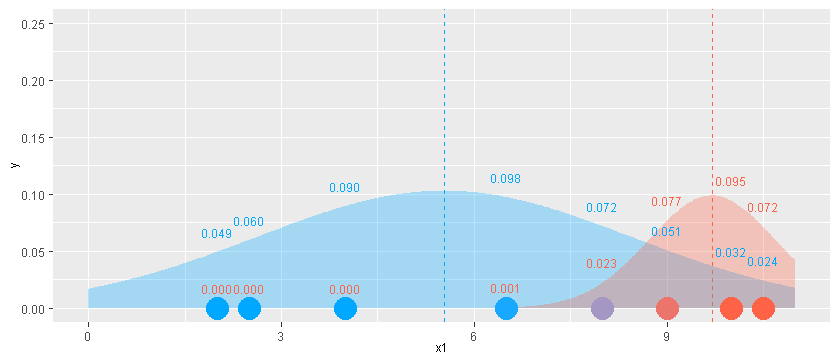

In [11]:
n = 1
for (i in 1:n)   { size.A = sum(data$weight.A) / sum(c(data$weight.A, data$weight.B))
                   mean.A = weighted.mean(data$x1, data$weight.A)
                   sd.A = sqrt(sum(data$weight.A * (data$x1 - mean.A)^2) / sum(data$weight.A))
                   size.B = sum(data$weight.B) / sum(c(data$weight.A, data$weight.B))
                   mean.B = weighted.mean(data$x1, data$weight.B)
                   sd.B = sqrt(sum(data$weight.B * (data$x1 - mean.B)^2) / sum(data$weight.B))

                   data$g.A = gaussian(data$x1, mean.A, sd.A, size=size.A)
                   data$g.B = gaussian(data$x1, mean.B, sd.B, size=size.B)
                   data$weight.A = data$g.A / (data$g.A + data$g.B)
                   data$weight.B = data$g.B / (data$g.A + data$g.B) }                                 

data.frame(cluster=c("A","B"), size=c(size.A, size.B), mean=c(mean.A, mean.B), sd=c(sd.A, sd.B)) %>% caption(sprintf("Iteration %d", n), position="left")
data
                                                              
ggplot(data) + xlim(0,11) + ylim(0,0.25) +
geom_vline(aes(xintercept=mean.A), color=PALETTE[1], lty="dashed") +
geom_vline(aes(xintercept=mean.B), color=PALETTE[2], lty="dashed") +
stat_function(fun=gaussian, args=c(mean=mean.A, sd=sd.A, size=size.A), n=500, geom="area", fill=PALETTE[1], alpha=0.3) +
stat_function(fun=gaussian, args=c(mean=mean.B, sd=sd.B, size=size.B), n=500, geom="area", fill=PALETTE[2], alpha=0.3) +
geom_point(aes(x=x1, y=0, color=weight.A), size=6) +
geom_text(aes(x=x1, y=g.A, label=sprintf("%0.3f", g.A)), color=PALETTE[1]) +
geom_text(aes(x=x1, y=g.B, label=sprintf("%0.3f", g.B)), color=PALETTE[2]) +
scale_color_gradient(high=PALETTE[1], low=PALETTE[2]) +
theme.no_legend

cluster,size,mean,sd
A,0.373673,2.829513,0.8492576
B,0.626327,8.789637,1.4511605


x1,g.A,g.B,weight.A,weight.B
2.0,1.089418e-01,0.000003037119,9.999721e-01,0.00002787758
2.5,1.628066e-01,0.000014348253,9.999119e-01,0.00008812292
4.0,6.790111e-02,0.000742103388,9.891890e-01,0.01081102272
6.5,1.542162e-05,0.049592914073,3.108676e-04,0.99968913242
8.0,1.568299e-09,0.148491129540,1.056157e-08,0.99999998944
9.0,6.038643e-13,0.170385511997,3.544106e-12,1.00000000000
10.0,5.811641e-17,0.121600138015,4.779304e-16,1.00000000000
10.5,3.389782e-19,0.085970259819,3.942971e-18,1.00000000000


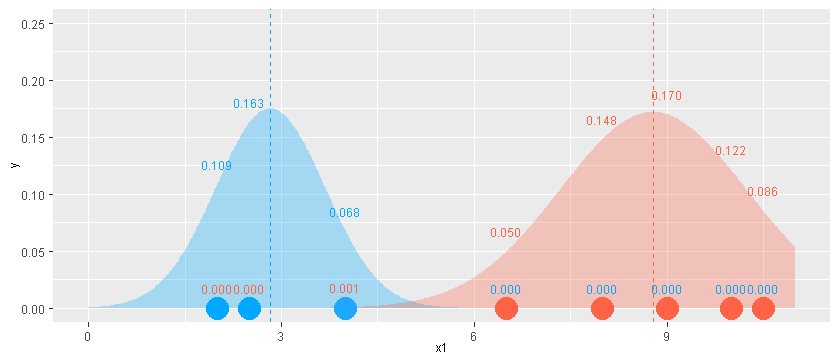

In [12]:
n = 100
for (i in 2:n)   { size.A = sum(data$weight.A) / sum(c(data$weight.A, data$weight.B))
                   mean.A = weighted.mean(data$x1, data$weight.A)
                   sd.A = sqrt(sum(data$weight.A * (data$x1 - mean.A)^2) / sum(data$weight.A))
                   size.B = sum(data$weight.B) / sum(c(data$weight.A, data$weight.B))
                   mean.B = weighted.mean(data$x1, data$weight.B)
                   sd.B = sqrt(sum(data$weight.B * (data$x1 - mean.B)^2) / sum(data$weight.B))

                   data$g.A = gaussian(data$x1, mean.A, sd.A, size=size.A)
                   data$g.B = gaussian(data$x1, mean.B, sd.B, size=size.B)
                   data$weight.A = data$g.A / (data$g.A + data$g.B)
                   data$weight.B = data$g.B / (data$g.A + data$g.B) }                                 

data.frame(cluster=c("A","B"), size=c(size.A, size.B), mean=c(mean.A, mean.B), sd=c(sd.A, sd.B)) %>% caption(sprintf("Iteration %d", n), position="left")
data
                                                              
ggplot(data) + xlim(0,11) + ylim(0,0.25) +
geom_vline(aes(xintercept=mean.A), color=PALETTE[1], lty="dashed") +
geom_vline(aes(xintercept=mean.B), color=PALETTE[2], lty="dashed") +
stat_function(fun=gaussian, args=c(mean=mean.A, sd=sd.A, size=size.A), n=500, geom="area", fill=PALETTE[1], alpha=0.3) +
stat_function(fun=gaussian, args=c(mean=mean.B, sd=sd.B, size=size.B), n=500, geom="area", fill=PALETTE[2], alpha=0.3) +
geom_point(aes(x=x1, y=0, color=weight.A), size=6) +
geom_text(aes(x=x1, y=g.A, label=sprintf("%0.3f", g.A)), color=PALETTE[1]) +
geom_text(aes(x=x1, y=g.B, label=sprintf("%0.3f", g.B)), color=PALETTE[2]) +
scale_color_gradient(high=PALETTE[1], low=PALETTE[2]) +
theme.no_legend

#### Commit Cluster Assignments

x1,g.A,g.B,weight.A,weight.B,cluster
2.0,1.089418e-01,0.000003037119,9.999721e-01,0.00002787758,A
2.5,1.628066e-01,0.000014348253,9.999119e-01,0.00008812292,A
4.0,6.790111e-02,0.000742103388,9.891890e-01,0.01081102272,A
6.5,1.542162e-05,0.049592914073,3.108676e-04,0.99968913242,B
8.0,1.568299e-09,0.148491129540,1.056157e-08,0.99999998944,B
9.0,6.038643e-13,0.170385511997,3.544106e-12,1.00000000000,B
10.0,5.811641e-17,0.121600138015,4.779304e-16,1.00000000000,B
10.5,3.389782e-19,0.085970259819,3.942971e-18,1.00000000000,B


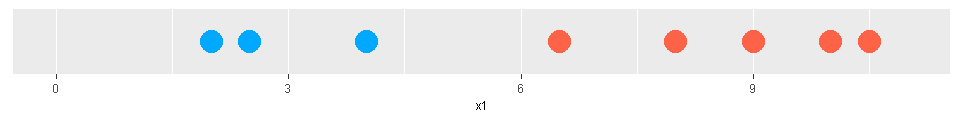

In [13]:
data$cluster = factor(data$weight.A < data$weight.B, labels=c("A", "B"))
data
      
output_size(8,1)                    
ggplot(data) + xlim(0,11) + geom_point(aes(x=x1, y=0, color=cluster), size=6) +
theme.x_axis_only + theme.no_legend
output_size(restore)

### Example: One Variable, Many Clusters - Initialization I

#### Data

x1
2.0
2.5
4.0
6.5
8.0
9.0
10.0
10.5


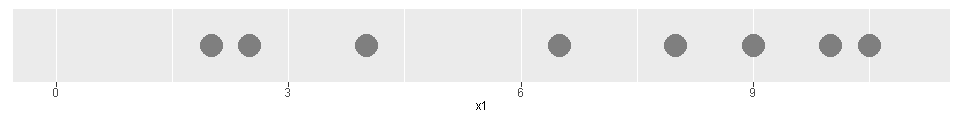

In [14]:
data = data.frame(x1=c(2.0, 2.5, 4.0, 6.5, 8.0, 9.0, 10.0, 10.5))
data

output_size(8,1)
ggplot(data) + xlim(0,11) + geom_point(aes(x=x1, y=0)) + theme.x_axis_only
output_size(restore)

#### Initialize

In [15]:
size.A = 1/3; mean.A = 9;  sd.A = 1
size.B = 1/3; mean.B = 10; sd.B = 1
size.C = 1/3; mean.C = 8;  sd.C = 1

data.frame(class=c("A","B","C"), size=c(size.A, size.B, size.C), mean=c(mean.A, mean.B, mean.C), sd=c(sd.A, sd.B, sd.C)) %>% caption("Initialization", position="left")

class,size,mean,sd
A,0.3333333,9,1
B,0.3333333,10,1
C,0.3333333,8,1


x1,g.A,g.B,g.C,weight.A,weight.B,weight.C
2.0,0.000000000003044907,0.00000000000000168409,0.000000002025294,0.001501181,0.0000008302798,0.99849799
2.5,0.000000000088985220,0.00000000000008114402,0.000000035899200,0.002472618,0.0000022547354,0.99752513
4.0,0.000000495573171578,0.00000000202529428327,0.000044610075255,0.010986449,0.0000448991073,0.98896865
6.5,0.005842766831189512,0.00029089423168192000,0.043172531888631,0.118499655,0.0058997504019,0.87560060
8.0,0.080656908173047784,0.01799698883772934965,0.132980760133811,0.348207428,0.0776955791486,0.57409699
9.0,0.132980760133810882,0.08065690817304778382,0.080656908173048,0.451862762,0.2740686190612,0.27406862
10.0,0.080656908173047784,0.13298076013381088245,0.017996988837729,0.348207428,0.5740969929677,0.07769558
10.5,0.043172531888630572,0.11735510892143315165,0.005842766831190,0.259496460,0.7053845126982,0.03511903


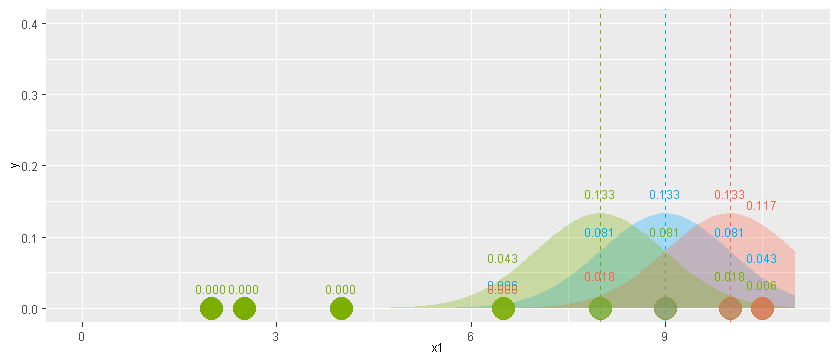

In [16]:
data$g.A = gaussian(data$x1, mean.A, sd.A, size=size.A)
data$g.B = gaussian(data$x1, mean.B, sd.B, size=size.B)
data$g.C = gaussian(data$x1, mean.C, sd.C, size=size.C)

data$weight.A = data$g.A / (data$g.A + data$g.B + data$g.C)
data$weight.B = data$g.B / (data$g.A + data$g.B + data$g.C)
data$weight.C = data$g.C / (data$g.A + data$g.B + data$g.C)

data$cluster = NULL
data                                                    

ggplot(data) + xlim(0,11) + ylim(0,0.4) +
geom_vline(aes(xintercept=mean.A), color=PALETTE[1], lty="dashed") +
geom_vline(aes(xintercept=mean.B), color=PALETTE[2], lty="dashed") +
geom_vline(aes(xintercept=mean.C), color=PALETTE[3], lty="dashed") +
stat_function(fun=gaussian, args=c(mean=mean.A, sd=sd.A, size=size.A), n=500, geom="area", fill=PALETTE[1], alpha=0.3) +
stat_function(fun=gaussian, args=c(mean=mean.B, sd=sd.B, size=size.B), n=500, geom="area", fill=PALETTE[2], alpha=0.3) +
stat_function(fun=gaussian, args=c(mean=mean.C, sd=sd.C, size=size.C), n=500, geom="area", fill=PALETTE[3], alpha=0.3) +
geom_point(aes(x=x1, y=0, alpha=weight.A), color=PALETTE[1], size=6) +
geom_point(aes(x=x1, y=0, alpha=weight.B), color=PALETTE[2], size=6) +
geom_point(aes(x=x1, y=0, alpha=weight.C), color=PALETTE[3], size=6) +
geom_text(aes(x=x1, y=g.A, label=sprintf("%0.3f", g.A)), color=PALETTE[1]) +
geom_text(aes(x=x1, y=g.B, label=sprintf("%0.3f", g.B)), color=PALETTE[2]) +
geom_text(aes(x=x1, y=g.C, label=sprintf("%0.3f", g.C)), color=PALETTE[3]) +
theme.no_legend

#### Iterate

Use expectation-maximization to iteratively update partial cluster assignments & Guassian functions.

cluster,size,mean,sd
A,0.1926542,9.007450,1.266841
B,0.2046492,9.940319,0.711772
C,0.6026966,4.634004,2.498178


x1,g.A,g.B,g.C,weight.A,weight.B,weight.C
2.0,0.00000001377088,1.085565e-28,0.055205669,0.0000002494467,1.966400e-27,0.99999975
2.5,0.00000011304986,2.147241e-25,0.066824127,0.0000016917493,3.213267e-24,0.99999831
4.0,0.00002456315312,8.603911e-17,0.093196458,0.0002634937149,9.229582e-16,0.99973651
6.5,0.00855598470405,9.694384e-07,0.072817174,0.1051437958990,1.191335e-05,0.89484429
8.0,0.04422206155935,2.791864e-03,0.038830144,0.5151440471280,3.252251e-02,0.45233345
9.0,0.06066789334053,4.792846e-02,0.020899706,0.4684921884134,3.701152e-01,0.16139260
10.0,0.04463456733569,1.143017e-01,0.009583472,0.2648626258478,6.782688e-01,0.05686856
10.5,0.03030747241417,8.420094e-02,0.006111088,0.2512651149041,6.980707e-01,0.05066418


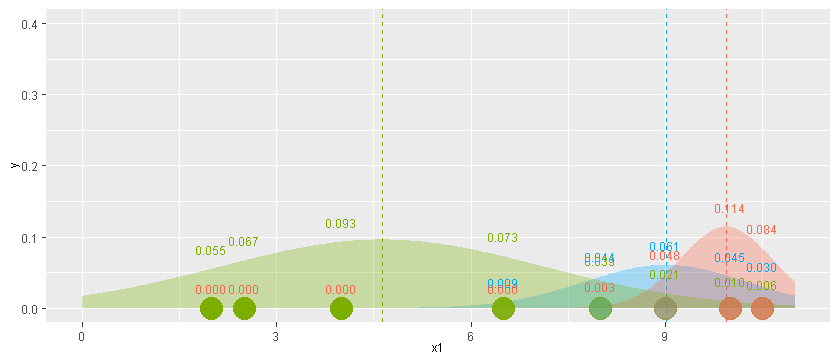

In [17]:
n = 1
for (i in 1:n)   { size.A = sum(data$weight.A) / sum(c(data$weight.A, data$weight.B, data$weight.C)) 
                   mean.A = weighted.mean(data$x1, data$weight.A)
                   sd.A = sqrt(sum(data$weight.A * (data$x1 - mean.A)^2) / sum(data$weight.A))
                   size.B = sum(data$weight.B) / sum(c(data$weight.A, data$weight.B, data$weight.C))
                   mean.B = weighted.mean(data$x1, data$weight.B)
                   sd.B = sqrt(sum(data$weight.B * (data$x1 - mean.B)^2) / sum(data$weight.B))
                   size.C = sum(data$weight.C) / sum(c(data$weight.A, data$weight.B, data$weight.C))
                   mean.C = weighted.mean(data$x1, data$weight.C)
                   sd.C = sqrt(sum(data$weight.C * (data$x1 - mean.C)^2) / sum(data$weight.C))

                   data$g.A = gaussian(data$x1, mean.A, sd.A, size=size.A)
                   data$g.B = gaussian(data$x1, mean.B, sd.B, size=size.B)
                   data$g.C = gaussian(data$x1, mean.C, sd.C, size=size.C)
                   data$weight.A = data$g.A / (data$g.A + data$g.B + data$g.C)
                   data$weight.B = data$g.B / (data$g.A + data$g.B + data$g.C)
                   data$weight.C = data$g.C / (data$g.A + data$g.B + data$g.C)}                                 

data.frame(cluster=c("A","B","C"), size=c(size.A, size.B, size.C), mean=c(mean.A, mean.B, mean.C), sd=c(sd.A, sd.B, sd.C)) %>% caption(sprintf("Iteration %d", n), position="left")
data
                                    
ggplot(data) + xlim(0,11) + ylim(0,0.4) +
geom_vline(aes(xintercept=mean.A), color=PALETTE[1], lty="dashed") +
geom_vline(aes(xintercept=mean.B), color=PALETTE[2], lty="dashed") +
geom_vline(aes(xintercept=mean.C), color=PALETTE[3], lty="dashed") +
stat_function(fun=gaussian, args=c(mean=mean.A, sd=sd.A, size=size.A), n=500, geom="area", fill=PALETTE[1], alpha=0.3) +
stat_function(fun=gaussian, args=c(mean=mean.B, sd=sd.B, size=size.B), n=500, geom="area", fill=PALETTE[2], alpha=0.3) +
stat_function(fun=gaussian, args=c(mean=mean.C, sd=sd.C, size=size.C), n=500, geom="area", fill=PALETTE[3], alpha=0.3) +
geom_point(aes(x=x1, y=0, alpha=weight.A), color=PALETTE[1], size=6) +
geom_point(aes(x=x1, y=0, alpha=weight.B), color=PALETTE[2], size=6) +
geom_point(aes(x=x1, y=0, alpha=weight.C), color=PALETTE[3], size=6) +
geom_text(aes(x=x1, y=g.A, label=sprintf("%0.3f", g.A)), color=PALETTE[1]) +
geom_text(aes(x=x1, y=g.B, label=sprintf("%0.3f", g.B)), color=PALETTE[2]) +
geom_text(aes(x=x1, y=g.C, label=sprintf("%0.3f", g.C)), color=PALETTE[3]) +
theme.no_legend

cluster,size,mean,sd
A,0.3946705,7.939825,1.1287852
B,0.2308732,10.258786,0.2498661
C,0.3744563,2.831858,0.8498998


x1,g.A,g.B,g.C,weight.A,weight.B,weight.C
2.0,0.0000001354266,2.164391e-238,1.088724e-01,0.000001243901,1.988005e-237,9.999988e-01
2.5,0.0000012629570,1.550699e-210,1.628682e-01,0.000007754414,9.521118e-210,9.999922e-01
4.0,0.0003156236781,2.098289e-137,6.834864e-02,0.004596622143,3.055867e-136,9.954034e-01
6.5,0.0618340416290,2.670763e-50,1.584939e-05,0.999743744229,4.318137e-49,2.562558e-04
8.0,0.1392888351833,6.622497e-19,1.642322e-09,0.999999988209,4.754507e-18,1.179076e-08
9.0,0.0897389921030,1.136095e-06,6.420028e-13,0.999987340163,1.265983e-05,7.154021e-12
10.0,0.0263752963333,2.156000e-01,6.285999e-17,0.108999942248,8.910001e-01,2.597785e-16
10.5,0.0106533736051,2.313164e-01,3.701071e-19,0.044027698474,9.559723e-01,1.529559e-18


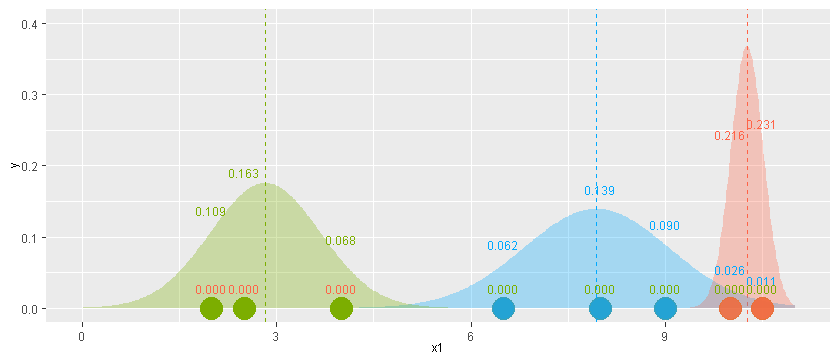

In [18]:
n = 30
for (i in 2:n)   { size.A = sum(data$weight.A) / sum(c(data$weight.A, data$weight.B, data$weight.C)) 
                   mean.A = weighted.mean(data$x1, data$weight.A)
                   sd.A = sqrt(sum(data$weight.A * (data$x1 - mean.A)^2) / sum(data$weight.A))
                   size.B = sum(data$weight.B) / sum(c(data$weight.A, data$weight.B, data$weight.C))
                   mean.B = weighted.mean(data$x1, data$weight.B)
                   sd.B = sqrt(sum(data$weight.B * (data$x1 - mean.B)^2) / sum(data$weight.B))
                   size.C = sum(data$weight.C) / sum(c(data$weight.A, data$weight.B, data$weight.C))
                   mean.C = weighted.mean(data$x1, data$weight.C)
                   sd.C = sqrt(sum(data$weight.C * (data$x1 - mean.C)^2) / sum(data$weight.C))

                   data$g.A = gaussian(data$x1, mean.A, sd.A, size=size.A)
                   data$g.B = gaussian(data$x1, mean.B, sd.B, size=size.B)
                   data$g.C = gaussian(data$x1, mean.C, sd.C, size=size.C)
                   data$weight.A = data$g.A / (data$g.A + data$g.B + data$g.C)
                   data$weight.B = data$g.B / (data$g.A + data$g.B + data$g.C)
                   data$weight.C = data$g.C / (data$g.A + data$g.B + data$g.C)}                                 

data.frame(cluster=c("A","B","C"), size=c(size.A, size.B, size.C), mean=c(mean.A, mean.B, mean.C), sd=c(sd.A, sd.B, sd.C)) %>% caption(sprintf("Iteration %d", n), position="left")
data
                                    
ggplot(data) + xlim(0,11) + ylim(0,0.4) +
geom_vline(aes(xintercept=mean.A), color=PALETTE[1], lty="dashed") +
geom_vline(aes(xintercept=mean.B), color=PALETTE[2], lty="dashed") +
geom_vline(aes(xintercept=mean.C), color=PALETTE[3], lty="dashed") +
stat_function(fun=gaussian, args=c(mean=mean.A, sd=sd.A, size=size.A), n=500, geom="area", fill=PALETTE[1], alpha=0.3) +
stat_function(fun=gaussian, args=c(mean=mean.B, sd=sd.B, size=size.B), n=500, geom="area", fill=PALETTE[2], alpha=0.3) +
stat_function(fun=gaussian, args=c(mean=mean.C, sd=sd.C, size=size.C), n=500, geom="area", fill=PALETTE[3], alpha=0.3) +
geom_point(aes(x=x1, y=0, alpha=weight.A), color=PALETTE[1], size=6) +
geom_point(aes(x=x1, y=0, alpha=weight.B), color=PALETTE[2], size=6) +
geom_point(aes(x=x1, y=0, alpha=weight.C), color=PALETTE[3], size=6) +
geom_text(aes(x=x1, y=g.A, label=sprintf("%0.3f", g.A)), color=PALETTE[1]) +
geom_text(aes(x=x1, y=g.B, label=sprintf("%0.3f", g.B)), color=PALETTE[2]) +
geom_text(aes(x=x1, y=g.C, label=sprintf("%0.3f", g.C)), color=PALETTE[3]) +
theme.no_legend

#### Commit Cluster Assignments

x1,g.A,g.B,g.C,weight.A,weight.B,weight.C,cluster
2.0,0.0000001354266,2.164391e-238,1.088724e-01,0.000001243901,1.988005e-237,9.999988e-01,C
2.5,0.0000012629570,1.550699e-210,1.628682e-01,0.000007754414,9.521118e-210,9.999922e-01,C
4.0,0.0003156236781,2.098289e-137,6.834864e-02,0.004596622143,3.055867e-136,9.954034e-01,C
6.5,0.0618340416290,2.670763e-50,1.584939e-05,0.999743744229,4.318137e-49,2.562558e-04,A
8.0,0.1392888351833,6.622497e-19,1.642322e-09,0.999999988209,4.754507e-18,1.179076e-08,A
9.0,0.0897389921030,1.136095e-06,6.420028e-13,0.999987340163,1.265983e-05,7.154021e-12,A
10.0,0.0263752963333,2.156000e-01,6.285999e-17,0.108999942248,8.910001e-01,2.597785e-16,B
10.5,0.0106533736051,2.313164e-01,3.701071e-19,0.044027698474,9.559723e-01,1.529559e-18,B


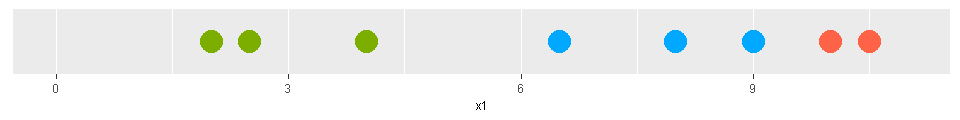

In [19]:
data$cluster = pick(data[, c("weight.A","weight.B","weight.C")], max, c("A","B","C"))
data

output_size(8,1)               
ggplot(data) + xlim(0,11) +
geom_point(aes(x=x1, y=0, color=cluster), size=6) +
theme.x_axis_only +
theme.no_legend             
output_size(restore)

### Example: One Variable, Many Clusters - Initialization II

#### Initialize

In [20]:
size.A = 1/3; mean.A = 1; sd.A = 2
size.B = 1/3; mean.B = 5; sd.B = 0.5
size.C = 1/3; mean.C = 10; sd.C = 0.3

data.frame(class=c("A","B","C"), size=c(size.A, size.B, size.C), mean=c(mean.A, mean.B, mean.C), sd=c(sd.A, sd.B, sd.C)) %>% caption("Initialization", position="left")

class,size,mean,sd
A,0.3333333,1,2.0
B,0.3333333,5,0.5
C,0.3333333,10,0.3


x1,g.A,g.B,g.C,weight.A,weight.B,weight.C
2.0,0.0586775544607,4.050589e-09,1.701578e-155,0.999999930969,6.903131e-08,2.899878e-154
2.5,0.0501895720258,9.911463e-07,8.504366e-137,0.999980252337,1.974766e-05,1.694415e-135
4.0,0.0215862659443,3.599398e-02,6.134387e-88,0.374890146121,6.251099e-01,1.065363e-86
6.5,0.0015155937503,2.954566e-03,1.231729e-30,0.339046917304,6.609531e-01,2.755449e-28
8.0,0.0001454471158,4.050589e-09,9.901000e-11,0.999971470867,2.784842e-05,6.807091e-07
9.0,0.0000223050376,3.368181e-15,1.713643e-03,0.012848906139,1.940254e-12,9.871511e-01
10.0,0.0000026639569,5.129732e-23,4.432692e-01,0.000006009758,1.157243e-22,9.999940e-01
10.5,0.0000008382512,1.412546e-27,1.105302e-01,0.000007583857,1.277964e-26,9.999924e-01


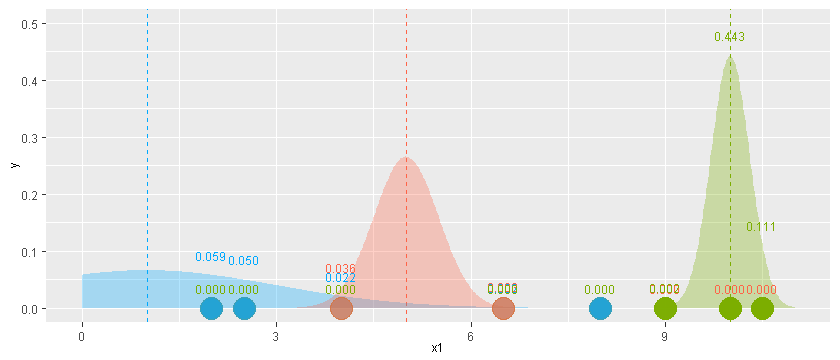

In [21]:
data$g.A = gaussian(data$x1, mean.A, sd.A, size=size.A)
data$g.B = gaussian(data$x1, mean.B, sd.B, size=size.B)
data$g.C = gaussian(data$x1, mean.C, sd.C, size=size.C)

data$weight.A = data$g.A / (data$g.A + data$g.B + data$g.C)
data$weight.B = data$g.B / (data$g.A + data$g.B + data$g.C)
data$weight.C = data$g.C / (data$g.A + data$g.B + data$g.C)

data$cluster = NULL
data                                                    

ggplot(data) + xlim(0,11) + ylim(0,0.5) +
geom_vline(aes(xintercept=mean.A), color=PALETTE[1], lty="dashed") +
geom_vline(aes(xintercept=mean.B), color=PALETTE[2], lty="dashed") +
geom_vline(aes(xintercept=mean.C), color=PALETTE[3], lty="dashed") +
stat_function(fun=gaussian, args=c(mean=mean.A, sd=sd.A, size=size.A), n=500, geom="area", fill=PALETTE[1], alpha=0.3) +
stat_function(fun=gaussian, args=c(mean=mean.B, sd=sd.B, size=size.B), n=500, geom="area", fill=PALETTE[2], alpha=0.3) +
stat_function(fun=gaussian, args=c(mean=mean.C, sd=sd.C, size=size.C), n=500, geom="area", fill=PALETTE[3], alpha=0.3) +
geom_point(aes(x=x1, y=0, alpha=weight.A), color=PALETTE[1], size=6) +
geom_point(aes(x=x1, y=0, alpha=weight.B), color=PALETTE[2], size=6) +
geom_point(aes(x=x1, y=0, alpha=weight.C), color=PALETTE[3], size=6) +
geom_text(aes(x=x1, y=g.A, label=sprintf("%0.3f", g.A)), color=PALETTE[1]) +
geom_text(aes(x=x1, y=g.B, label=sprintf("%0.3f", g.B)), color=PALETTE[2]) +
geom_text(aes(x=x1, y=g.C, label=sprintf("%0.3f", g.C)), color=PALETTE[3]) +
theme.no_legend

#### Iterate

Use expectation-maximization to iteratively update partial cluster assignments & Guassian functions.

cluster,size,mean,sd
A,0.4658439,4.378845,2.5459046
B,0.1607638,5.284854,1.2496030
C,0.3733923,9.836915,0.6225456


x1,g.A,g.B,g.C,weight.A,weight.B,weight.C
2.0,0.047176312,0.001621080184,9.279098e-36,0.96677937,0.03322063157,1.901556e-34
2.5,0.055596116,0.004283897006,1.653370e-31,0.92845865,0.07154135006,2.761139e-30
4.0,0.072193820,0.030252060047,1.950278e-20,0.70470203,0.29529796630,1.903716e-19
6.5,0.051590906,0.031988168735,1.380655e-07,0.61726958,0.38272876327,1.651912e-06
8.0,0.026546382,0.004843449263,3.078541e-03,0.77016641,0.14051865344,8.931494e-02
9.0,0.014056330,0.000617933831,9.693097e-02,0.12594687,0.00553678181,8.685163e-01
10.0,0.006378736,0.000041553164,2.312078e-01,0.02684336,0.00017486639,9.729818e-01
10.5,0.004055454,0.000008474972,1.356925e-01,0.02901802,0.00006064103,9.709213e-01


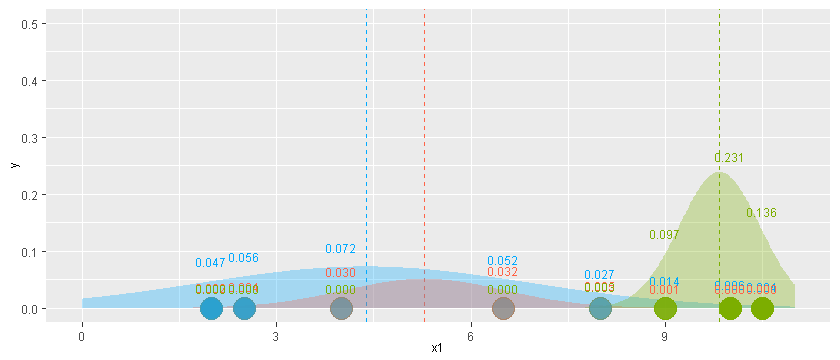

In [22]:
n = 1
for (i in 1:n)   { size.A = sum(data$weight.A) / sum(c(data$weight.A, data$weight.B, data$weight.C)) 
                   mean.A = weighted.mean(data$x1, data$weight.A)
                   sd.A = sqrt(sum(data$weight.A * (data$x1 - mean.A)^2) / sum(data$weight.A))
                   size.B = sum(data$weight.B) / sum(c(data$weight.A, data$weight.B, data$weight.C))
                   mean.B = weighted.mean(data$x1, data$weight.B)
                   sd.B = sqrt(sum(data$weight.B * (data$x1 - mean.B)^2) / sum(data$weight.B))
                   size.C = sum(data$weight.C) / sum(c(data$weight.A, data$weight.B, data$weight.C))
                   mean.C = weighted.mean(data$x1, data$weight.C)
                   sd.C = sqrt(sum(data$weight.C * (data$x1 - mean.C)^2) / sum(data$weight.C))

                   data$g.A = gaussian(data$x1, mean.A, sd.A, size=size.A)
                   data$g.B = gaussian(data$x1, mean.B, sd.B, size=size.B)
                   data$g.C = gaussian(data$x1, mean.C, sd.C, size=size.C)
                   data$weight.A = data$g.A / (data$g.A + data$g.B + data$g.C)
                   data$weight.B = data$g.B / (data$g.A + data$g.B + data$g.C)
                   data$weight.C = data$g.C / (data$g.A + data$g.B + data$g.C)}                                 

data.frame(cluster=c("A","B","C"), size=c(size.A, size.B, size.C), mean=c(mean.A, mean.B, mean.C), sd=c(sd.A, sd.B, sd.C)) %>% caption(sprintf("Iteration %d", n), position="left")
data
                                    
ggplot(data) + xlim(0,11) + ylim(0,0.5) +
geom_vline(aes(xintercept=mean.A), color=PALETTE[1], lty="dashed") +
geom_vline(aes(xintercept=mean.B), color=PALETTE[2], lty="dashed") +
geom_vline(aes(xintercept=mean.C), color=PALETTE[3], lty="dashed") +
stat_function(fun=gaussian, args=c(mean=mean.A, sd=sd.A, size=size.A), n=500, geom="area", fill=PALETTE[1], alpha=0.3) +
stat_function(fun=gaussian, args=c(mean=mean.B, sd=sd.B, size=size.B), n=500, geom="area", fill=PALETTE[2], alpha=0.3) +
stat_function(fun=gaussian, args=c(mean=mean.C, sd=sd.C, size=size.C), n=500, geom="area", fill=PALETTE[3], alpha=0.3) +
geom_point(aes(x=x1, y=0, alpha=weight.A), color=PALETTE[1], size=6) +
geom_point(aes(x=x1, y=0, alpha=weight.B), color=PALETTE[2], size=6) +
geom_point(aes(x=x1, y=0, alpha=weight.C), color=PALETTE[3], size=6) +
geom_text(aes(x=x1, y=g.A, label=sprintf("%0.3f", g.A)), color=PALETTE[1]) +
geom_text(aes(x=x1, y=g.B, label=sprintf("%0.3f", g.B)), color=PALETTE[2]) +
geom_text(aes(x=x1, y=g.C, label=sprintf("%0.3f", g.C)), color=PALETTE[3]) +
theme.no_legend

cluster,size,mean,sd
A,0.3744563,2.831858,0.8498998
B,0.3946706,7.939825,1.1287855
C,0.2308731,10.258786,0.2498661


x1,g.A,g.B,g.C,weight.A,weight.B,weight.C
2.0,1.088724e-01,0.0000001354272,2.164380e-238,9.999988e-01,0.000001243906,1.987995e-237
2.5,1.628682e-01,0.0000012629616,1.550692e-210,9.999922e-01,0.000007754442,9.521074e-210
4.0,6.834864e-02,0.0003156241931,2.098281e-137,9.954034e-01,0.004596629683,3.055857e-136
6.5,1.584939e-05,0.0618340398689,2.670758e-50,2.562558e-04,0.999743744241,4.318129e-49
8.0,1.642321e-09,0.1392888258068,6.622490e-19,1.179076e-08,0.999999988209,4.754502e-18
9.0,6.420027e-13,0.0897390195272,1.136094e-06,7.154018e-12,0.999987340174,1.265982e-05
10.0,6.285997e-17,0.0263753226445,2.156000e-01,2.597785e-16,0.109000065624,8.909999e-01
10.5,3.701070e-19,0.0106533891931,2.313164e-01,1.529559e-18,0.044027765893,9.559722e-01


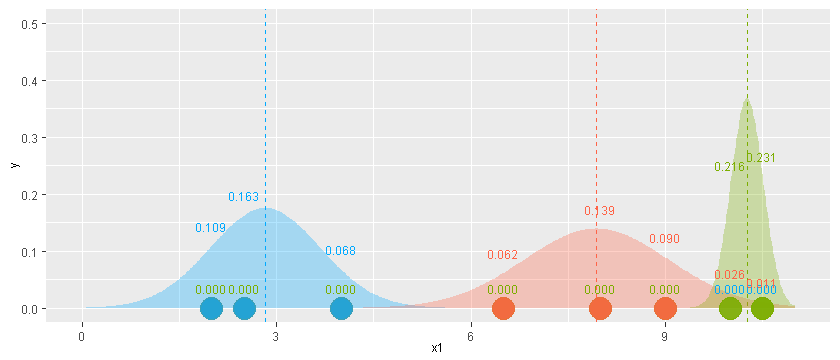

In [23]:
n = 100
for (i in 2:n)   { size.A = sum(data$weight.A) / sum(c(data$weight.A, data$weight.B, data$weight.C)) 
                   mean.A = weighted.mean(data$x1, data$weight.A)
                   sd.A = sqrt(sum(data$weight.A * (data$x1 - mean.A)^2) / sum(data$weight.A))
                   size.B = sum(data$weight.B) / sum(c(data$weight.A, data$weight.B, data$weight.C))
                   mean.B = weighted.mean(data$x1, data$weight.B)
                   sd.B = sqrt(sum(data$weight.B * (data$x1 - mean.B)^2) / sum(data$weight.B))
                   size.C = sum(data$weight.C) / sum(c(data$weight.A, data$weight.B, data$weight.C))
                   mean.C = weighted.mean(data$x1, data$weight.C)
                   sd.C = sqrt(sum(data$weight.C * (data$x1 - mean.C)^2) / sum(data$weight.C))

                   data$g.A = gaussian(data$x1, mean.A, sd.A, size=size.A)
                   data$g.B = gaussian(data$x1, mean.B, sd.B, size=size.B)
                   data$g.C = gaussian(data$x1, mean.C, sd.C, size=size.C)
                   data$weight.A = data$g.A / (data$g.A + data$g.B + data$g.C)
                   data$weight.B = data$g.B / (data$g.A + data$g.B + data$g.C)
                   data$weight.C = data$g.C / (data$g.A + data$g.B + data$g.C)}                                 

data.frame(cluster=c("A","B","C"), size=c(size.A, size.B, size.C), mean=c(mean.A, mean.B, mean.C), sd=c(sd.A, sd.B, sd.C)) %>% caption(sprintf("Iteration %d", n), position="left")
data
                                    
ggplot(data) + xlim(0,11) + ylim(0,0.5) +
geom_vline(aes(xintercept=mean.A), color=PALETTE[1], lty="dashed") +
geom_vline(aes(xintercept=mean.B), color=PALETTE[2], lty="dashed") +
geom_vline(aes(xintercept=mean.C), color=PALETTE[3], lty="dashed") +
stat_function(fun=gaussian, args=c(mean=mean.A, sd=sd.A, size=size.A), n=500, geom="area", fill=PALETTE[1], alpha=0.3) +
stat_function(fun=gaussian, args=c(mean=mean.B, sd=sd.B, size=size.B), n=500, geom="area", fill=PALETTE[2], alpha=0.3) +
stat_function(fun=gaussian, args=c(mean=mean.C, sd=sd.C, size=size.C), n=500, geom="area", fill=PALETTE[3], alpha=0.3) +
geom_point(aes(x=x1, y=0, alpha=weight.A), color=PALETTE[1], size=6) +
geom_point(aes(x=x1, y=0, alpha=weight.B), color=PALETTE[2], size=6) +
geom_point(aes(x=x1, y=0, alpha=weight.C), color=PALETTE[3], size=6) +
geom_text(aes(x=x1, y=g.A, label=sprintf("%0.3f", g.A)), color=PALETTE[1]) +
geom_text(aes(x=x1, y=g.B, label=sprintf("%0.3f", g.B)), color=PALETTE[2]) +
geom_text(aes(x=x1, y=g.C, label=sprintf("%0.3f", g.C)), color=PALETTE[3]) +
theme.no_legend

#### Commit Cluster Assignments

x1,g.A,g.B,g.C,weight.A,weight.B,weight.C,cluster
2.0,1.088724e-01,0.0000001354272,2.164380e-238,9.999988e-01,0.000001243906,1.987995e-237,A
2.5,1.628682e-01,0.0000012629616,1.550692e-210,9.999922e-01,0.000007754442,9.521074e-210,A
4.0,6.834864e-02,0.0003156241931,2.098281e-137,9.954034e-01,0.004596629683,3.055857e-136,A
6.5,1.584939e-05,0.0618340398689,2.670758e-50,2.562558e-04,0.999743744241,4.318129e-49,B
8.0,1.642321e-09,0.1392888258068,6.622490e-19,1.179076e-08,0.999999988209,4.754502e-18,B
9.0,6.420027e-13,0.0897390195272,1.136094e-06,7.154018e-12,0.999987340174,1.265982e-05,B
10.0,6.285997e-17,0.0263753226445,2.156000e-01,2.597785e-16,0.109000065624,8.909999e-01,C
10.5,3.701070e-19,0.0106533891931,2.313164e-01,1.529559e-18,0.044027765893,9.559722e-01,C


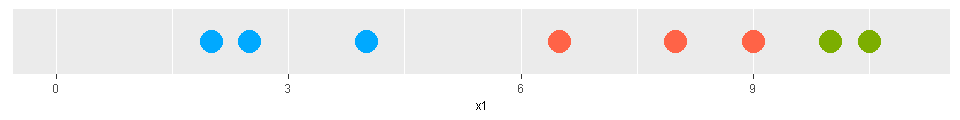

In [24]:
data$cluster = pick(data[, c("weight.A","weight.B","weight.C")], max, c("A","B","C"))
data

output_size(8,1)               
ggplot(data) + xlim(0,11) +
geom_point(aes(x=x1, y=0, color=cluster), size=6) +
theme.x_axis_only +
theme.no_legend             
output_size(restore)

### Example: Two Variables, Two Clusters - Initialization I

#### Data

x1,x2
2.0,10.0
2.5,6.2
4.0,9.0
6.5,6.0
8.0,1.0
9.0,3.5
10.0,2.0
10.5,7.0


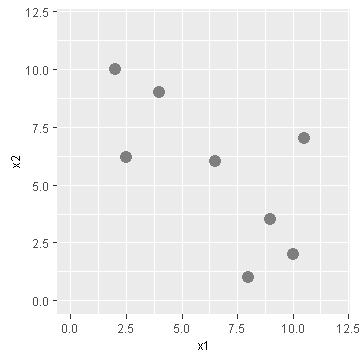

In [25]:
data = data.frame(x1=c(2.0,  2.5, 4.0, 6.5, 8.0, 9.0, 10.0, 10.5),
                  x2=c(10.0, 6.2, 9.0, 6.0, 1.0, 3.5,  2.0,  7.0))
data

output_size(3,3)
ggplot(data) + xlim(0,12) + ylim(0,12) +  geom_point(aes(x=x1, y=x2), size=3) + theme.no_legend
output_size(restore)

#### Initialize

Each Gaussian function is defined by a size, the mean of each variable, the standard deviation of each variable, and the correlation between variables.

cluster,size,mean.x1,mean.x2,sd.x1,sd.x2,cor
A,0.5,7,2,2,1,0
B,0.5,8,2,2,1,0


x1,x2,g.A,g.B,weight.A,weight.B
2.0,10.0,2.213943e-17,5.597725e-18,0.7981868,0.2018132
2.5,6.2,4.677081e-07,1.340006e-07,0.7772999,0.2227001
4.0,9.0,2.957768e-13,1.232981e-13,0.7057850,0.2942150
6.5,6.0,1.293697e-05,1.007532e-05,0.5621765,0.4378235
8.0,1.0,2.129738e-02,2.413309e-02,0.4687906,0.5312094
9.0,3.5,7.834867e-03,1.139966e-02,0.4073334,0.5926666
10.0,2.0,1.291751e-02,2.413309e-02,0.3486451,0.6513549
10.5,7.0,3.206754e-08,6.788699e-08,0.3208213,0.6791787


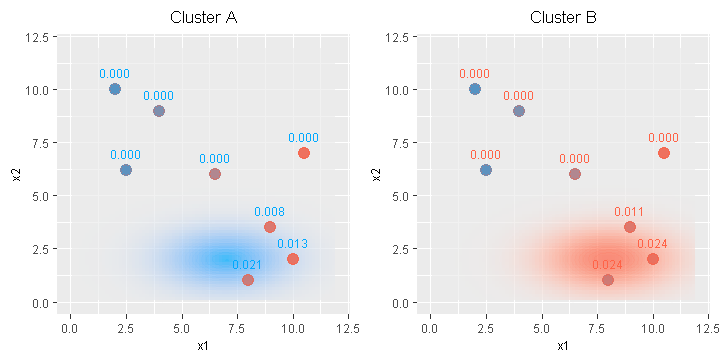

In [26]:
size.A = 0.5; mean.A = c(7,2); sd.A = c(2,1); cor.A = 0
size.B = 0.5; mean.B = c(8,2); sd.B = c(2,1); cor.B = 0

data$g.A = gaussian2(data[,c("x1","x2")], mean.A, as.covariance_matrix(sd.A, cor.A), size=size.A)
data$g.B = gaussian2(data[,c("x1","x2")], mean.B, as.covariance_matrix(sd.B, cor.B), size=size.B)          
data$weight.A = data$g.A / (data$g.A + data$g.B)
data$weight.B = data$g.B / (data$g.A + data$g.B)

data$cluster = NULL

data.frame(cluster=c("A","B"), size=c(size.A, size.B),
                               mean.x1=c(mean.A[1], mean.B[1]), mean.x2=c(mean.A[2], mean.B[2]), 
                               sd.x1=c(sd.A[1], sd.B[1]), sd.x2=c(sd.A[2], sd.B[2]),
                               cor=c(cor.A, cor.B)) %>% caption("Initialization", position="left") 
data

surface   = expand.grid(x1=seq(0,12,0.15), x2=seq(0,12,0.15))
surface$A = gaussian2(surface, mean.A, as.covariance_matrix(sd.A, cor.A), size=size.A)
surface$B = gaussian2(surface, mean.B, as.covariance_matrix(sd.B, cor.B), size=size.B)


output_size(6,3)

pA = ggplot(surface) + xlim(0,12) + ylim(0,12) + 
     geom_tile(aes(x=x1, y=x2, fill=A), alpha=0.7) +
     geom_contour(aes(x=x1, y=x2, z=A, color=..level.., alpha=..level..), bins=20) +
     geom_point(aes(x=x1, y=x2, alpha=weight.A), data=data, color=PALETTE[1], size=3) +
     geom_point(aes(x=x1, y=x2, alpha=weight.B), data=data, color=PALETTE[2], size=3) +
     geom_text(aes(x=x1, y=x2, label=sprintf("%0.3f", g.A)), data=data, color=PALETTE[1], vjust=-1.2) +
     scale_fill_gradient(low=theme_get()$panel.background$fill, high=PALETTE[1]) +
     scale_colour_gradient(low=theme_get()$panel.background$fill, high=PALETTE[1]) +
     ggtitle("Cluster A") +
     theme.no_legend

pB = ggplot(surface) + xlim(0,12) + ylim(0,12) + 
     geom_tile(aes(x=x1, y=x2, fill=B), alpha=0.7) +
     geom_contour(aes(x=x1, y=x2, z=B, color=..level.., alpha=..level..), bins=20) +
     geom_point(aes(x=x1, y=x2, alpha=weight.A), data=data, color=PALETTE[1], size=3) +
     geom_point(aes(x=x1, y=x2, alpha=weight.B), data=data, color=PALETTE[2], size=3) +
     geom_text(aes(x=x1, y=x2, label=sprintf("%0.3f", g.B)), data=data, color=PALETTE[2], vjust=-1.2) +
     scale_fill_gradient(low=theme_get()$panel.background$fill, high=PALETTE[2]) +
     scale_color_gradient(low=theme_get()$panel.background$fill, high=PALETTE[2]) +
     ggtitle("Cluster B") +
     theme.no_legend

grid.arrange(pA, pB, nrow=1)

output_size(restore)

#### Iterate

Use expectation-maximization to iteratively update partial cluster assignments & Guassian functions.

cluster,size,mean.x1,mean.x2,sd.x1,sd.x2,cor
A,0.5047318,3.800659,7.754517,2.094129,2.067838,-0.5660389
B,0.4952682,9.377114,3.379076,1.111019,2.633836,0.7382655


x1,x2,g.A,g.B,weight.A,weight.B
2.0,10.0,0.01193891643,6.017661e-38,1.000000000,5.040374e-36
2.5,6.2,0.00757712054,1.243469e-25,1.000000000,1.641084e-23
4.0,9.0,0.01631863047,9.308922e-23,1.000000000,5.704475e-21
6.5,6.0,0.00970339399,1.294188e-07,0.999986663,1.333730e-05
8.0,1.0,0.00010653941,1.852150e-02,0.005719304,9.942807e-01
9.0,3.5,0.00075471584,3.422820e-02,0.021573841,9.784262e-01
10.0,2.0,0.00011416636,1.299020e-02,0.008712083,9.912879e-01
10.5,7.0,0.00002896364,1.552191e-02,0.001862509,9.981375e-01


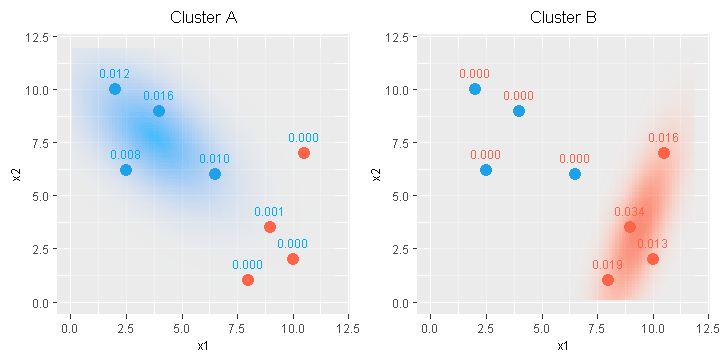

In [27]:
n = 100
for (i in 1:n)    { size.A = sum(data$weight.A) / sum(c(data$weight.A, data$weight.B))
                    mean.A = c(weighted.mean(data$x1, data$weight.A), weighted.mean(data$x2, data$weight.A))
                    cm.A = cov.wt(data[,c("x1","x2")], data$weight.A)$cov
                    size.B = sum(data$weight.B) / sum(c(data$weight.A, data$weight.B))
                    mean.B = c(weighted.mean(data$x1, data$weight.B), weighted.mean(data$x2, data$weight.B))
                    cm.B = cov.wt(data[,c("x1","x2")], data$weight.B)$cov

                    data$g.A = gaussian2(data[,c("x1","x2")], mean.A, cm.A, size=size.A)
                    data$g.B = gaussian2(data[,c("x1","x2")], mean.B, cm.B, size=size.B)      
                    data$weight.A = data$g.A / (data$g.A + data$g.B)
                    data$weight.B = data$g.B / (data$g.A + data$g.B) }                                 

surface$A = gaussian2(surface, mean.A, cm.A, size=size.A)
surface$B = gaussian2(surface, mean.B, cm.B, size=size.B)

data.frame(cluster=c("A","B"), size=c(size.A, size.B),
                               mean.x1=c(mean.A[1], mean.B[1]), mean.x2=c(mean.A[2], mean.B[2]), 
                               sd.x1=c(get.sd(cm.A)[1], get.sd(cm.B)[1]), sd.x2=c(get.sd(cm.A)[2], get.sd(cm.B)[2]),
                               cor=c(get.cor(cm.A), get.cor(cm.B))) %>% caption(sprintf("Iteration %d", n), position="left")                                                  
data


output_size(6,3)

pA = ggplot(surface) + xlim(0,12) + ylim(0,12) + 
     geom_tile(aes(x=x1, y=x2, fill=A), alpha=0.7) +
     geom_contour(aes(x=x1, y=x2, z=A, color=..level.., alpha=..level..), bins=20) +
     geom_point(aes(x=x1, y=x2, alpha=weight.A), data=data, color=PALETTE[1], size=3) +
     geom_point(aes(x=x1, y=x2, alpha=weight.B), data=data, color=PALETTE[2], size=3) +
     geom_text(aes(x=x1, y=x2, label=sprintf("%0.3f", g.A)), data=data, color=PALETTE[1], vjust=-1.2) +
     scale_fill_gradient(low=theme_get()$panel.background$fill, high=PALETTE[1]) +
     scale_colour_gradient(low=theme_get()$panel.background$fill, high=PALETTE[1]) +
     ggtitle("Cluster A") +
     theme.no_legend

pB = ggplot(surface) + xlim(0,12) + ylim(0,12) +
     geom_tile(aes(x=x1, y=x2, fill=B), alpha=0.7) +
     geom_contour(aes(x=x1, y=x2, z=B, color=..level.., alpha=..level..), bins=20) +
     geom_point(aes(x=x1, y=x2, alpha=weight.A), data=data, color=PALETTE[1], size=3) +
     geom_point(aes(x=x1, y=x2, alpha=weight.B), data=data, color=PALETTE[2], size=3) +
     geom_text(aes(x=x1, y=x2, label=sprintf("%0.3f", g.B)), data=data, color=PALETTE[2], vjust=-1.2) +
     scale_fill_gradient(low=theme_get()$panel.background$fill, high=PALETTE[2]) +
     scale_color_gradient(low=theme_get()$panel.background$fill, high=PALETTE[2]) + 
     ggtitle("Cluster B") +
     theme.no_legend

grid.arrange(pA, pB, nrow=1)

output_size(restore)

#### Commit Cluster Assignments

x1,x2,g.A,g.B,weight.A,weight.B,cluster
2.0,10.0,0.01193891643,6.017661e-38,1.000000000,5.040374e-36,A
2.5,6.2,0.00757712054,1.243469e-25,1.000000000,1.641084e-23,A
4.0,9.0,0.01631863047,9.308922e-23,1.000000000,5.704475e-21,A
6.5,6.0,0.00970339399,1.294188e-07,0.999986663,1.333730e-05,A
8.0,1.0,0.00010653941,1.852150e-02,0.005719304,9.942807e-01,B
9.0,3.5,0.00075471584,3.422820e-02,0.021573841,9.784262e-01,B
10.0,2.0,0.00011416636,1.299020e-02,0.008712083,9.912879e-01,B
10.5,7.0,0.00002896364,1.552191e-02,0.001862509,9.981375e-01,B


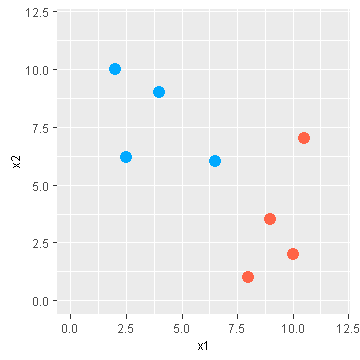

In [28]:
data$cluster = factor(data$weight.A < data$weight.B, labels=c("A", "B"))
data

output_size(3,3)
ggplot(data) + xlim(0,12) + ylim(0,12) + geom_point(aes(x=x1, y=x2, color=cluster), size=3) +
scale_color_manual(values=PALETTE[1:2]) + theme.no_legend
output_size(restore)

### Example: Two Variables, Two Clusters - Initialization II

#### Data

x1,x2
2.0,10.0
2.5,6.2
4.0,9.0
6.5,6.0
8.0,1.0
9.0,3.5
10.0,2.0
10.5,7.0


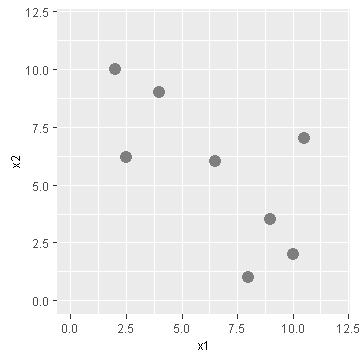

In [29]:
data = data.frame(x1=c(2.0,  2.5, 4.0, 6.5, 8.0, 9.0, 10.0, 10.5),
                  x2=c(10.0, 6.2, 9.0, 6.0, 1.0, 3.5,  2.0,  7.0))
data

output_size(3,3)
ggplot(data) + xlim(0,12) + ylim(0,12) +  geom_point(aes(x=x1, y=x2), size=3) + theme.no_legend
output_size(restore)

#### Initialize

Each Gaussian function is defined by a size, the mean of each variable, the standard deviation of each variable, and the correlation between variables.

cluster,size,mean.x1,mean.x2,sd.x1,sd.x2,cor
A,0.5,6,10,4,1,0
B,0.5,6,2,1,4,0


x1,x2,g.A,g.B,weight.A,weight.B
2.0,10.0,1.206654e-02,0.0000009032029,9.999252e-01,0.00007484623
2.5,6.2,9.928203e-06,0.0000250767708,2.836226e-01,0.71637737117
4.0,9.0,1.064869e-02,0.0005822744790,9.481545e-01,0.05184546665
6.5,6.0,6.621881e-06,0.0106486877744,6.214630e-04,0.99937853698
8.0,1.0,4.523940e-20,0.0026095731683,1.733594e-17,1.00000000000
9.0,3.5,1.004879e-11,0.0002060006759,4.878039e-08,0.99999995122
10.0,2.0,1.528127e-16,0.0000066738169,2.289735e-11,0.99999999998
10.5,7.0,1.173756e-04,0.0000003649270,9.969006e-01,0.00309941552


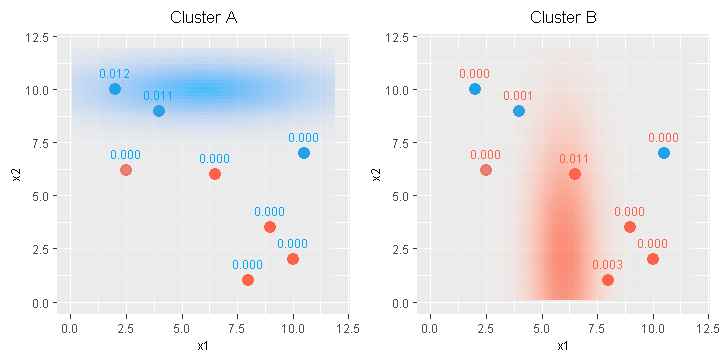

In [30]:
size.A = 0.5; mean.A = c(6,10); sd.A = c(4,1); cor.A = 0
size.B = 0.5; mean.B = c(6,2); sd.B = c(1,4); cor.B = 0

data$g.A = gaussian2(data[,c("x1","x2")], mean.A, as.covariance_matrix(sd.A, cor.A), size=size.A)
data$g.B = gaussian2(data[,c("x1","x2")], mean.B, as.covariance_matrix(sd.B, cor.B), size=size.B)          
data$weight.A = data$g.A / (data$g.A + data$g.B)
data$weight.B = data$g.B / (data$g.A + data$g.B)

data$cluster = NULL

data.frame(cluster=c("A","B"), size=c(size.A, size.B),
                               mean.x1=c(mean.A[1], mean.B[1]), mean.x2=c(mean.A[2], mean.B[2]), 
                               sd.x1=c(sd.A[1], sd.B[1]), sd.x2=c(sd.A[2], sd.B[2]),
                               cor=c(cor.A, cor.B)) %>% caption("Initialization", position="left") 
data

surface   = expand.grid(x1=seq(0,12,0.15), x2=seq(0,12,0.15))
surface$A = gaussian2(surface, mean.A, as.covariance_matrix(sd.A, cor.A), size=size.A)
surface$B = gaussian2(surface, mean.B, as.covariance_matrix(sd.B, cor.B), size=size.B)


output_size(6,3)

pA = ggplot(surface) + xlim(0,12) + ylim(0,12) + 
     geom_tile(aes(x=x1, y=x2, fill=A), alpha=0.7) +
     geom_contour(aes(x=x1, y=x2, z=A, color=..level.., alpha=..level..), bins=20) +
     geom_point(aes(x=x1, y=x2, alpha=weight.A), data=data, color=PALETTE[1], size=3) +
     geom_point(aes(x=x1, y=x2, alpha=weight.B), data=data, color=PALETTE[2], size=3) +
     geom_text(aes(x=x1, y=x2, label=sprintf("%0.3f", g.A)), data=data, color=PALETTE[1], vjust=-1.2) +
     scale_fill_gradient(low=theme_get()$panel.background$fill, high=PALETTE[1]) +
     scale_colour_gradient(low=theme_get()$panel.background$fill, high=PALETTE[1]) +
     ggtitle("Cluster A") +
     theme.no_legend

pB = ggplot(surface) + xlim(0,12) + ylim(0,12) + 
     geom_tile(aes(x=x1, y=x2, fill=B), alpha=0.7) +
     geom_contour(aes(x=x1, y=x2, z=B, color=..level.., alpha=..level..), bins=20) +
     geom_point(aes(x=x1, y=x2, alpha=weight.A), data=data, color=PALETTE[1], size=3) +
     geom_point(aes(x=x1, y=x2, alpha=weight.B), data=data, color=PALETTE[2], size=3) +
     geom_text(aes(x=x1, y=x2, label=sprintf("%0.3f", g.B)), data=data, color=PALETTE[2], vjust=-1.2) +
     scale_fill_gradient(low=theme_get()$panel.background$fill, high=PALETTE[2]) +
     scale_color_gradient(low=theme_get()$panel.background$fill, high=PALETTE[2]) +
     ggtitle("Cluster B") +
     theme.no_legend

grid.arrange(pA, pB, nrow=1)

output_size(restore)

#### Iterate

Use expectation-maximization to iteratively update partial cluster assignments & Guassian functions.

cluster,size,mean.x1,mean.x2,sd.x1,sd.x2,cor
A,0.3685847,5.535810,8.655633,4.465075,1.534684,-0.9944391
B,0.6314153,7.161824,3.796496,2.940194,2.397248,-0.7594407


x1,x2,g.A,g.B,weight.A,weight.B
2.0,10.0,4.173245e-02,0.00073126071,9.827792e-01,0.017220837
2.5,6.2,2.334868e-103,0.00594307601,3.928720e-101,1.000000000
4.0,9.0,4.104818e-02,0.00140978041,9.667958e-01,0.033204151
6.5,6.0,8.354585e-47,0.01102843313,7.575496e-45,1.000000000
8.0,1.0,0.000000e+00,0.00724485894,0.000000e+00,1.000000000
9.0,3.5,4.530683e-133,0.01558207102,2.907626e-131,1.000000000
10.0,2.0,8.743831e-221,0.01374901707,6.359604e-219,1.000000000
10.5,7.0,4.241990e-02,0.00003810037,9.991026e-01,0.000897366


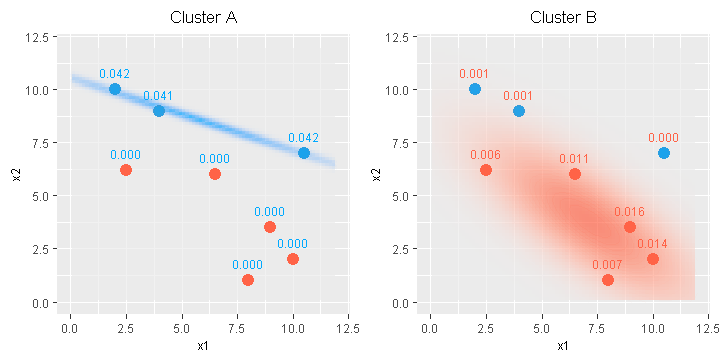

In [31]:
n = 100
for (i in 1:n)    { size.A = sum(data$weight.A) / sum(c(data$weight.A, data$weight.B))
                    mean.A = c(weighted.mean(data$x1, data$weight.A), weighted.mean(data$x2, data$weight.A))
                    cm.A = cov.wt(data[,c("x1","x2")], data$weight.A)$cov
                    size.B = sum(data$weight.B) / sum(c(data$weight.A, data$weight.B))
                    mean.B = c(weighted.mean(data$x1, data$weight.B), weighted.mean(data$x2, data$weight.B))
                    cm.B = cov.wt(data[,c("x1","x2")], data$weight.B)$cov

                    data$g.A = gaussian2(data[,c("x1","x2")], mean.A, cm.A, size=size.A)
                    data$g.B = gaussian2(data[,c("x1","x2")], mean.B, cm.B, size=size.B)      
                    data$weight.A = data$g.A / (data$g.A + data$g.B)
                    data$weight.B = data$g.B / (data$g.A + data$g.B) }                                 

surface$A = gaussian2(surface, mean.A, cm.A, size=size.A)
surface$B = gaussian2(surface, mean.B, cm.B, size=size.B)

data.frame(cluster=c("A","B"), size=c(size.A, size.B),
                               mean.x1=c(mean.A[1], mean.B[1]), mean.x2=c(mean.A[2], mean.B[2]), 
                               sd.x1=c(get.sd(cm.A)[1], get.sd(cm.B)[1]), sd.x2=c(get.sd(cm.A)[2], get.sd(cm.B)[2]),
                               cor=c(get.cor(cm.A), get.cor(cm.B))) %>% caption(sprintf("Iteration %d", n), position="left")                                                  
data


output_size(6,3)

pA = ggplot(surface) + xlim(0,12) + ylim(0,12) + 
     geom_tile(aes(x=x1, y=x2, fill=A), alpha=0.7) +
     geom_contour(aes(x=x1, y=x2, z=A, color=..level.., alpha=..level..), bins=20) +
     geom_point(aes(x=x1, y=x2, alpha=weight.A), data=data, color=PALETTE[1], size=3) +
     geom_point(aes(x=x1, y=x2, alpha=weight.B), data=data, color=PALETTE[2], size=3) +
     geom_text(aes(x=x1, y=x2, label=sprintf("%0.3f", g.A)), data=data, color=PALETTE[1], vjust=-1.2) +
     scale_fill_gradient(low=theme_get()$panel.background$fill, high=PALETTE[1]) +
     scale_colour_gradient(low=theme_get()$panel.background$fill, high=PALETTE[1]) +
     ggtitle("Cluster A") +
     theme.no_legend

pB = ggplot(surface) + xlim(0,12) + ylim(0,12) +
     geom_tile(aes(x=x1, y=x2, fill=B), alpha=0.7) +
     geom_contour(aes(x=x1, y=x2, z=B, color=..level.., alpha=..level..), bins=20) +
     geom_point(aes(x=x1, y=x2, alpha=weight.A), data=data, color=PALETTE[1], size=3) +
     geom_point(aes(x=x1, y=x2, alpha=weight.B), data=data, color=PALETTE[2], size=3) +
     geom_text(aes(x=x1, y=x2, label=sprintf("%0.3f", g.B)), data=data, color=PALETTE[2], vjust=-1.2) +
     scale_fill_gradient(low=theme_get()$panel.background$fill, high=PALETTE[2]) +
     scale_color_gradient(low=theme_get()$panel.background$fill, high=PALETTE[2]) + 
     ggtitle("Cluster B") +
     theme.no_legend

grid.arrange(pA, pB, nrow=1)

output_size(restore)

#### Commit Cluster Assignments

x1,x2,g.A,g.B,weight.A,weight.B,cluster
2.0,10.0,4.173245e-02,0.00073126071,9.827792e-01,0.017220837,A
2.5,6.2,2.334868e-103,0.00594307601,3.928720e-101,1.000000000,B
4.0,9.0,4.104818e-02,0.00140978041,9.667958e-01,0.033204151,A
6.5,6.0,8.354585e-47,0.01102843313,7.575496e-45,1.000000000,B
8.0,1.0,0.000000e+00,0.00724485894,0.000000e+00,1.000000000,B
9.0,3.5,4.530683e-133,0.01558207102,2.907626e-131,1.000000000,B
10.0,2.0,8.743831e-221,0.01374901707,6.359604e-219,1.000000000,B
10.5,7.0,4.241990e-02,0.00003810037,9.991026e-01,0.000897366,A


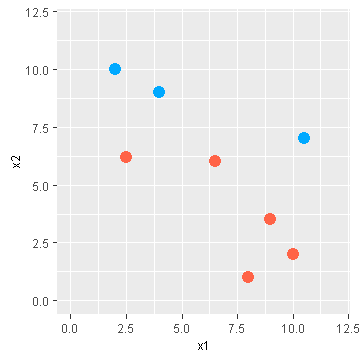

In [32]:
data$cluster = factor(data$weight.A < data$weight.B, labels=c("A", "B"))
data

output_size(3,3)
ggplot(data) + xlim(0,12) + ylim(0,12) + geom_point(aes(x=x1, y=x2, color=cluster), size=3) +
scale_color_manual(values=PALETTE[1:2]) + theme.no_legend
output_size(restore)

### Example: Two Variables, Two Clusters - Initialization III

#### Data

x1,x2
2.0,10.0
2.5,6.2
4.0,9.0
6.5,6.0
8.0,1.0
9.0,3.5
10.0,2.0
10.5,7.0


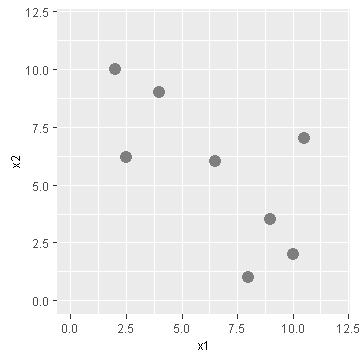

In [33]:
data = data.frame(x1=c(2.0,  2.5, 4.0, 6.5, 8.0, 9.0, 10.0, 10.5),
                  x2=c(10.0, 6.2, 9.0, 6.0, 1.0, 3.5,  2.0,  7.0))
data

output_size(3,3)
ggplot(data) + xlim(0,12) + ylim(0,12) +  geom_point(aes(x=x1, y=x2), size=3) + theme.no_legend
output_size(restore)

#### Initialize

Each Gaussian function is defined by a size, the mean of each variable, the standard deviation of each variable, and the correlation between variables.

cluster,size,mean.x1,mean.x2,sd.x1,sd.x2,cor
A,0.5,6,6,3,3,0
B,0.5,7,6,3,3,0


x1,x2,g.A,g.B,weight.A,weight.B
2.0,10.0,0.001494406,0.0009064029,0.6224593,0.3775407
2.5,6.2,0.004467052,0.0028641861,0.6093175,0.3906825
4.0,9.0,0.004294281,0.0032527684,0.5690013,0.4309987
6.5,6.0,0.008719985,0.0087199854,0.5000000,0.5000000
8.0,1.0,0.001765432,0.0020856113,0.4584295,0.5415705
9.0,3.5,0.003789690,0.0050031215,0.4309987,0.5690013
10.0,2.0,0.001494406,0.0022047576,0.4039848,0.5960152
10.5,7.0,0.002715432,0.0042350509,0.3906825,0.6093175


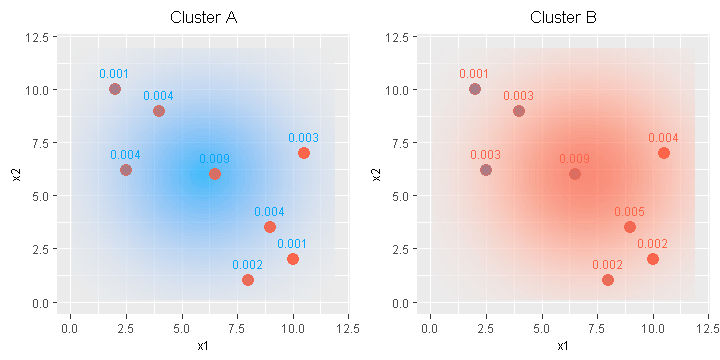

In [34]:
size.A = 0.5; mean.A = c(6,6); sd.A = c(3,3); cor.A = 0
size.B = 0.5; mean.B = c(7,6); sd.B = c(3,3); cor.B = 0


data$g.A = gaussian2(data[,c("x1","x2")], mean.A, as.covariance_matrix(sd.A, cor.A), size=size.A)
data$g.B = gaussian2(data[,c("x1","x2")], mean.B, as.covariance_matrix(sd.B, cor.B), size=size.B)          
data$weight.A = data$g.A / (data$g.A + data$g.B)
data$weight.B = data$g.B / (data$g.A + data$g.B)

data$cluster = NULL

data.frame(cluster=c("A","B"), size=c(size.A, size.B),
                               mean.x1=c(mean.A[1], mean.B[1]), mean.x2=c(mean.A[2], mean.B[2]), 
                               sd.x1=c(sd.A[1], sd.B[1]), sd.x2=c(sd.A[2], sd.B[2]),
                               cor=c(cor.A, cor.B)) %>% caption("Initialization", position="left") 
data

surface   = expand.grid(x1=seq(0,12,0.15), x2=seq(0,12,0.15))
surface$A = gaussian2(surface, mean.A, as.covariance_matrix(sd.A, cor.A), size=size.A)
surface$B = gaussian2(surface, mean.B, as.covariance_matrix(sd.B, cor.B), size=size.B)


output_size(6,3)

pA = ggplot(surface) + xlim(0,12) + ylim(0,12) + 
     geom_tile(aes(x=x1, y=x2, fill=A), alpha=0.7) +
     geom_contour(aes(x=x1, y=x2, z=A, color=..level.., alpha=..level..), bins=20) +
     geom_point(aes(x=x1, y=x2, alpha=weight.A), data=data, color=PALETTE[1], size=3) +
     geom_point(aes(x=x1, y=x2, alpha=weight.B), data=data, color=PALETTE[2], size=3) +
     geom_text(aes(x=x1, y=x2, label=sprintf("%0.3f", g.A)), data=data, color=PALETTE[1], vjust=-1.2) +
     scale_fill_gradient(low=theme_get()$panel.background$fill, high=PALETTE[1]) +
     scale_colour_gradient(low=theme_get()$panel.background$fill, high=PALETTE[1]) +
     ggtitle("Cluster A") +
     theme.no_legend

pB = ggplot(surface) + xlim(0,12) + ylim(0,12) + 
     geom_tile(aes(x=x1, y=x2, fill=B), alpha=0.7) +
     geom_contour(aes(x=x1, y=x2, z=B, color=..level.., alpha=..level..), bins=20) +
     geom_point(aes(x=x1, y=x2, alpha=weight.A), data=data, color=PALETTE[1], size=3) +
     geom_point(aes(x=x1, y=x2, alpha=weight.B), data=data, color=PALETTE[2], size=3) +
     geom_text(aes(x=x1, y=x2, label=sprintf("%0.3f", g.B)), data=data, color=PALETTE[2], vjust=-1.2) +
     scale_fill_gradient(low=theme_get()$panel.background$fill, high=PALETTE[2]) +
     scale_color_gradient(low=theme_get()$panel.background$fill, high=PALETTE[2]) +
     ggtitle("Cluster B") +
     theme.no_legend

grid.arrange(pA, pB, nrow=1)

output_size(restore)

#### Iterate

Use expectation-maximization to iteratively update partial cluster assignments & Guassian functions.

cluster,size,mean.x1,mean.x2,sd.x1,sd.x2,cor
A,0.6282216,5.019762,6.622018,3.299584,3.123661,-0.8626278
B,0.3717784,9.169378,3.839399,1.262547,3.024035,0.9998213


x1,x2,g.A,g.B,weight.A,weight.B
2.0,10.0,0.01068037761,0.0000000,1.0000000000,0.0000000
2.5,6.2,0.00418150343,0.0000000,1.0000000000,0.0000000
4.0,9.0,0.01133405162,0.0000000,1.0000000000,0.0000000
6.5,6.0,0.01618627970,0.0000000,1.0000000000,0.0000000
8.0,1.0,0.00166547645,0.4229448,0.0039223646,0.9960776
9.0,3.5,0.00923395978,0.4153433,0.0217485964,0.9782514
10.0,2.0,0.00577185210,0.0000000,1.0000000000,0.0000000
10.5,7.0,0.00004315845,0.4245564,0.0001016451,0.9998984


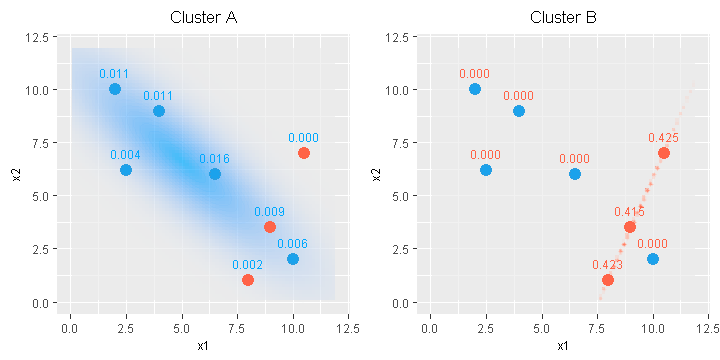

In [35]:
n = 100
for (i in 1:n)    { size.A = sum(data$weight.A) / sum(c(data$weight.A, data$weight.B))
                    mean.A = c(weighted.mean(data$x1, data$weight.A), weighted.mean(data$x2, data$weight.A))
                    cm.A = cov.wt(data[,c("x1","x2")], data$weight.A)$cov
                    size.B = sum(data$weight.B) / sum(c(data$weight.A, data$weight.B))
                    mean.B = c(weighted.mean(data$x1, data$weight.B), weighted.mean(data$x2, data$weight.B))
                    cm.B = cov.wt(data[,c("x1","x2")], data$weight.B)$cov

                    data$g.A = gaussian2(data[,c("x1","x2")], mean.A, cm.A, size=size.A)
                    data$g.B = gaussian2(data[,c("x1","x2")], mean.B, cm.B, size=size.B)      
                    data$weight.A = data$g.A / (data$g.A + data$g.B)
                    data$weight.B = data$g.B / (data$g.A + data$g.B) }                                 

surface$A = gaussian2(surface, mean.A, cm.A, size=size.A)
surface$B = gaussian2(surface, mean.B, cm.B, size=size.B)

data.frame(cluster=c("A","B"), size=c(size.A, size.B),
                               mean.x1=c(mean.A[1], mean.B[1]), mean.x2=c(mean.A[2], mean.B[2]), 
                               sd.x1=c(get.sd(cm.A)[1], get.sd(cm.B)[1]), sd.x2=c(get.sd(cm.A)[2], get.sd(cm.B)[2]),
                               cor=c(get.cor(cm.A), get.cor(cm.B))) %>% caption(sprintf("Iteration %d", n), position="left")                                                  
data


output_size(6,3)

pA = ggplot(surface) + xlim(0,12) + ylim(0,12) + 
     geom_tile(aes(x=x1, y=x2, fill=A), alpha=0.7) +
     geom_contour(aes(x=x1, y=x2, z=A, color=..level.., alpha=..level..), bins=20) +
     geom_point(aes(x=x1, y=x2, alpha=weight.A), data=data, color=PALETTE[1], size=3) +
     geom_point(aes(x=x1, y=x2, alpha=weight.B), data=data, color=PALETTE[2], size=3) +
     geom_text(aes(x=x1, y=x2, label=sprintf("%0.3f", g.A)), data=data, color=PALETTE[1], vjust=-1.2) +
     scale_fill_gradient(low=theme_get()$panel.background$fill, high=PALETTE[1]) +
     scale_colour_gradient(low=theme_get()$panel.background$fill, high=PALETTE[1]) +
     ggtitle("Cluster A") +
     theme.no_legend

pB = ggplot(surface) + xlim(0,12) + ylim(0,12) +
     geom_tile(aes(x=x1, y=x2, fill=B), alpha=0.7) +
     geom_contour(aes(x=x1, y=x2, z=B, color=..level.., alpha=..level..), bins=20) +
     geom_point(aes(x=x1, y=x2, alpha=weight.A), data=data, color=PALETTE[1], size=3) +
     geom_point(aes(x=x1, y=x2, alpha=weight.B), data=data, color=PALETTE[2], size=3) +
     geom_text(aes(x=x1, y=x2, label=sprintf("%0.3f", g.B)), data=data, color=PALETTE[2], vjust=-1.2) +
     scale_fill_gradient(low=theme_get()$panel.background$fill, high=PALETTE[2]) +
     scale_color_gradient(low=theme_get()$panel.background$fill, high=PALETTE[2]) + 
     ggtitle("Cluster B") +
     theme.no_legend

grid.arrange(pA, pB, nrow=1)

output_size(restore)

#### Commit Cluster Assignments

x1,x2,g.A,g.B,weight.A,weight.B,cluster
2.0,10.0,0.01068037761,0.0000000,1.0000000000,0.0000000,A
2.5,6.2,0.00418150343,0.0000000,1.0000000000,0.0000000,A
4.0,9.0,0.01133405162,0.0000000,1.0000000000,0.0000000,A
6.5,6.0,0.01618627970,0.0000000,1.0000000000,0.0000000,A
8.0,1.0,0.00166547645,0.4229448,0.0039223646,0.9960776,B
9.0,3.5,0.00923395978,0.4153433,0.0217485964,0.9782514,B
10.0,2.0,0.00577185210,0.0000000,1.0000000000,0.0000000,A
10.5,7.0,0.00004315845,0.4245564,0.0001016451,0.9998984,B


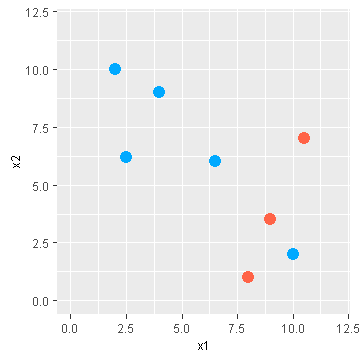

In [36]:
data$cluster = factor(data$weight.A < data$weight.B, labels=c("A", "B"))
data

output_size(3,3)
ggplot(data) + xlim(0,12) + ylim(0,12) + geom_point(aes(x=x1, y=x2, color=cluster), size=3) +
scale_color_manual(values=PALETTE[1:2]) + theme.no_legend
output_size(restore)

### Example: Two Variables, Two Clusters - Initialization IV

#### Data

x1,x2
2.0,10.0
2.5,6.2
4.0,9.0
6.5,6.0
8.0,1.0
9.0,3.5
10.0,2.0
10.5,7.0


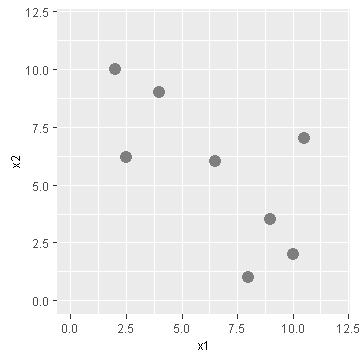

In [37]:
data = data.frame(x1=c(2.0,  2.5, 4.0, 6.5, 8.0, 9.0, 10.0, 10.5),
                  x2=c(10.0, 6.2, 9.0, 6.0, 1.0, 3.5,  2.0,  7.0))
data

output_size(3,3)
ggplot(data) + xlim(0,12) + ylim(0,12) +  geom_point(aes(x=x1, y=x2), size=3) + theme.no_legend
output_size(restore)

#### Initialize

Each Gaussian function is defined by a size, the mean of each variable, the standard deviation of each variable, and the correlation between variables.

cluster,size,mean.x1,mean.x2,sd.x1,sd.x2,cor
A,0.5,6,6,1,3,0
B,0.5,6,6,3,3,0


x1,x2,g.A,g.B,weight.A,weight.B
2.0,10.0,0.000003658251,0.001494406,0.0024419856,0.9975580
2.5,6.2,0.000057896203,0.004467052,0.0127948875,0.9872051
4.0,9.0,0.002177372214,0.004294281,0.3364475822,0.6635524
6.5,6.0,0.023408957385,0.008719985,0.7285940757,0.2714059
8.0,1.0,0.000895144478,0.001765432,0.3364475822,0.6635524
9.0,3.5,0.000208231783,0.003789690,0.0520850062,0.9479150
10.0,2.0,0.000003658251,0.001494406,0.0024419856,0.9975580
10.5,7.0,0.000001005333,0.002715432,0.0003700924,0.9996299


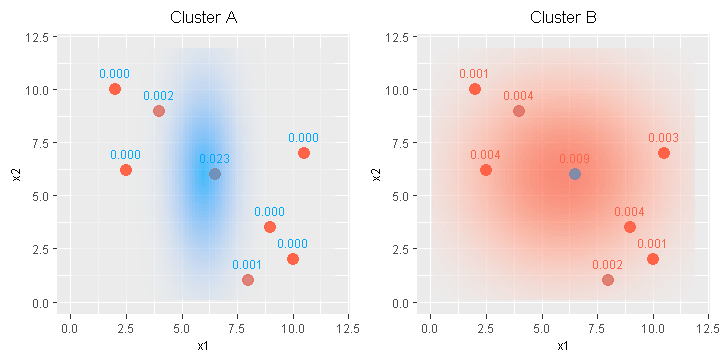

In [38]:
size.A = 0.5; mean.A = c(6,6); sd.A = c(1,3); cor.A = 0
size.B = 0.5; mean.B = c(6,6); sd.B = c(3,3); cor.B = 0


data$g.A = gaussian2(data[,c("x1","x2")], mean.A, as.covariance_matrix(sd.A, cor.A), size=size.A)
data$g.B = gaussian2(data[,c("x1","x2")], mean.B, as.covariance_matrix(sd.B, cor.B), size=size.B)          
data$weight.A = data$g.A / (data$g.A + data$g.B)
data$weight.B = data$g.B / (data$g.A + data$g.B)

data$cluster = NULL

data.frame(cluster=c("A","B"), size=c(size.A, size.B),
                               mean.x1=c(mean.A[1], mean.B[1]), mean.x2=c(mean.A[2], mean.B[2]), 
                               sd.x1=c(sd.A[1], sd.B[1]), sd.x2=c(sd.A[2], sd.B[2]),
                               cor=c(cor.A, cor.B)) %>% caption("Initialization", position="left") 
data

surface   = expand.grid(x1=seq(0,12,0.15), x2=seq(0,12,0.15))
surface$A = gaussian2(surface, mean.A, as.covariance_matrix(sd.A, cor.A), size=size.A)
surface$B = gaussian2(surface, mean.B, as.covariance_matrix(sd.B, cor.B), size=size.B)


output_size(6,3)

pA = ggplot(surface) + xlim(0,12) + ylim(0,12) + 
     geom_tile(aes(x=x1, y=x2, fill=A), alpha=0.7) +
     geom_contour(aes(x=x1, y=x2, z=A, color=..level.., alpha=..level..), bins=20) +
     geom_point(aes(x=x1, y=x2, alpha=weight.A), data=data, color=PALETTE[1], size=3) +
     geom_point(aes(x=x1, y=x2, alpha=weight.B), data=data, color=PALETTE[2], size=3) +
     geom_text(aes(x=x1, y=x2, label=sprintf("%0.3f", g.A)), data=data, color=PALETTE[1], vjust=-1.2) +
     scale_fill_gradient(low=theme_get()$panel.background$fill, high=PALETTE[1]) +
     scale_colour_gradient(low=theme_get()$panel.background$fill, high=PALETTE[1]) +
     ggtitle("Cluster A") +
     theme.no_legend

pB = ggplot(surface) + xlim(0,12) + ylim(0,12) + 
     geom_tile(aes(x=x1, y=x2, fill=B), alpha=0.7) +
     geom_contour(aes(x=x1, y=x2, z=B, color=..level.., alpha=..level..), bins=20) +
     geom_point(aes(x=x1, y=x2, alpha=weight.A), data=data, color=PALETTE[1], size=3) +
     geom_point(aes(x=x1, y=x2, alpha=weight.B), data=data, color=PALETTE[2], size=3) +
     geom_text(aes(x=x1, y=x2, label=sprintf("%0.3f", g.B)), data=data, color=PALETTE[2], vjust=-1.2) +
     scale_fill_gradient(low=theme_get()$panel.background$fill, high=PALETTE[2]) +
     scale_color_gradient(low=theme_get()$panel.background$fill, high=PALETTE[2]) +
     ggtitle("Cluster B") +
     theme.no_legend

grid.arrange(pA, pB, nrow=1)

output_size(restore)

#### Iterate

cluster,size,mean.x1,mean.x2,sd.x1,sd.x2,cor
A,0.5698396,6.247887,6.150846,3.351739,3.432561,-0.9926884
B,0.4301604,6.979273,4.841227,3.813893,3.163690,-0.2047272


x1,x2,g.A,g.B,weight.A,weight.B
2.0,10.0,1.539972e-02,0.0009371215,9.426375e-01,0.05736246
2.5,6.2,4.471094e-20,0.0028547053,1.566219e-17,1.00000000
4.0,9.0,2.065711e-02,0.0021307492,9.064963e-01,0.09350369
6.5,6.0,6.304671e-02,0.0054134238,9.209259e-01,0.07907411
8.0,1.0,2.473440e-16,0.0027732436,8.918942e-14,1.00000000
9.0,3.5,4.377385e-02,0.0047826744,9.015029e-01,0.09849705
10.0,2.0,2.510331e-02,0.0031931391,8.871541e-01,0.11284594
10.5,7.0,4.261702e-36,0.0025471657,1.673115e-33,1.00000000


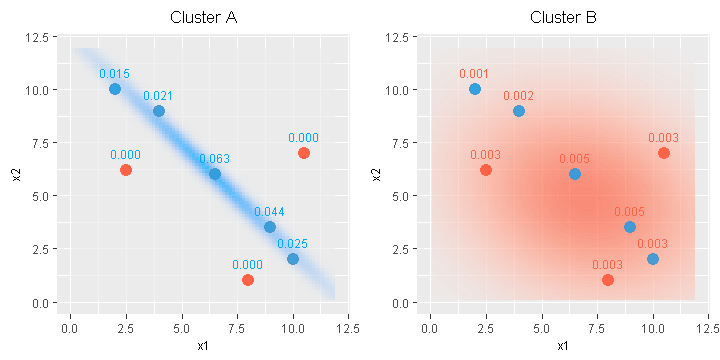

In [39]:
n = 100
for (i in 1:n)    { size.A = sum(data$weight.A) / sum(c(data$weight.A, data$weight.B))
                    mean.A = c(weighted.mean(data$x1, data$weight.A), weighted.mean(data$x2, data$weight.A))
                    cm.A = cov.wt(data[,c("x1","x2")], data$weight.A)$cov
                    size.B = sum(data$weight.B) / sum(c(data$weight.A, data$weight.B))
                    mean.B = c(weighted.mean(data$x1, data$weight.B), weighted.mean(data$x2, data$weight.B))
                    cm.B = cov.wt(data[,c("x1","x2")], data$weight.B)$cov

                    data$g.A = gaussian2(data[,c("x1","x2")], mean.A, cm.A, size=size.A)
                    data$g.B = gaussian2(data[,c("x1","x2")], mean.B, cm.B, size=size.B)      
                    data$weight.A = data$g.A / (data$g.A + data$g.B)
                    data$weight.B = data$g.B / (data$g.A + data$g.B) }                                 

surface$A = gaussian2(surface, mean.A, cm.A, size=size.A)
surface$B = gaussian2(surface, mean.B, cm.B, size=size.B)

data.frame(cluster=c("A","B"), size=c(size.A, size.B),
                               mean.x1=c(mean.A[1], mean.B[1]), mean.x2=c(mean.A[2], mean.B[2]), 
                               sd.x1=c(get.sd(cm.A)[1], get.sd(cm.B)[1]), sd.x2=c(get.sd(cm.A)[2], get.sd(cm.B)[2]),
                               cor=c(get.cor(cm.A), get.cor(cm.B))) %>% caption(sprintf("Iteration %d", n), position="left")                                                  
data

output_size(6,3)

pA = ggplot(surface) + xlim(0,12) + ylim(0,12) + 
     geom_tile(aes(x=x1, y=x2, fill=A), alpha=0.7) +
     geom_contour(aes(x=x1, y=x2, z=A, color=..level.., alpha=..level..), bins=20) +
     geom_point(aes(x=x1, y=x2, alpha=weight.A), data=data, color=PALETTE[1], size=3) +
     geom_point(aes(x=x1, y=x2, alpha=weight.B), data=data, color=PALETTE[2], size=3) +
     geom_text(aes(x=x1, y=x2, label=sprintf("%0.3f", g.A)), data=data, color=PALETTE[1], vjust=-1.2) +
     scale_fill_gradient(low=theme_get()$panel.background$fill, high=PALETTE[1]) +
     scale_colour_gradient(low=theme_get()$panel.background$fill, high=PALETTE[1]) +
     ggtitle("Cluster A") +
     theme.no_legend

pB = ggplot(surface) + xlim(0,12) + ylim(0,12) +
     geom_tile(aes(x=x1, y=x2, fill=B), alpha=0.7) +
     geom_contour(aes(x=x1, y=x2, z=B, color=..level.., alpha=..level..), bins=20) +
     geom_point(aes(x=x1, y=x2, alpha=weight.A), data=data, color=PALETTE[1], size=3) +
     geom_point(aes(x=x1, y=x2, alpha=weight.B), data=data, color=PALETTE[2], size=3) +
     geom_text(aes(x=x1, y=x2, label=sprintf("%0.3f", g.B)), data=data, color=PALETTE[2], vjust=-1.2) +
     scale_fill_gradient(low=theme_get()$panel.background$fill, high=PALETTE[2]) +
     scale_color_gradient(low=theme_get()$panel.background$fill, high=PALETTE[2]) + 
     ggtitle("Cluster B") +
     theme.no_legend

grid.arrange(pA, pB, nrow=1)

output_size(restore)

#### Commit Cluster Assignments

x1,x2,g.A,g.B,weight.A,weight.B,cluster
2.0,10.0,1.539972e-02,0.0009371215,9.426375e-01,0.05736246,A
2.5,6.2,4.471094e-20,0.0028547053,1.566219e-17,1.00000000,B
4.0,9.0,2.065711e-02,0.0021307492,9.064963e-01,0.09350369,A
6.5,6.0,6.304671e-02,0.0054134238,9.209259e-01,0.07907411,A
8.0,1.0,2.473440e-16,0.0027732436,8.918942e-14,1.00000000,B
9.0,3.5,4.377385e-02,0.0047826744,9.015029e-01,0.09849705,A
10.0,2.0,2.510331e-02,0.0031931391,8.871541e-01,0.11284594,A
10.5,7.0,4.261702e-36,0.0025471657,1.673115e-33,1.00000000,B


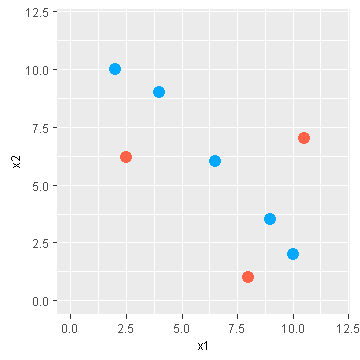

In [40]:
data$cluster = factor(data$weight.A < data$weight.B, labels=c("A", "B"))
data

output_size(3,3)
ggplot(data) + xlim(0,12) + ylim(0,12) + geom_point(aes(x=x1, y=x2, color=cluster), size=3) +
scale_color_manual(values=PALETTE[1:2]) + theme.no_legend
output_size(restore)

### Example: Many Variables, Many Clusters

#### Data

In [47]:
data = data.frame(x1=c(2.0,  2.5, 4.0, 6.5, 8.0, 9.0, 10.0, 10.5),
                  x2=c(10.0, 6.2, 9.0, 6.0, 1.0, 3.5,  2.0,  7.0),
                  x3=c(2,    3,   1,   4,   2,   4,    6,    7.3))
data

p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data[,c("x1","x2","x3")], type="s", col="grey50")
grid3d(c("x","y","z"))
rglwidget(elementId="data", width=300, height=300, reuse=FALSE)

x1,x2,x3
2.0,10.0,2.0
2.5,6.2,3.0
4.0,9.0,1.0
6.5,6.0,4.0
8.0,1.0,2.0
9.0,3.5,4.0
10.0,2.0,6.0
10.5,7.0,7.3


HTML widgets cannot be represented in plain text (need html)

#### Cluster Analysis

In [42]:
set.seed(12345)
data$cluster = Mclust(data[,c("x1", "x2", "x3")], G=3)$classification
data %>% caption("3 clusters")

p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data[,c("x1","x2","x3")], type="s", col=PALETTE[data$cluster])
grid3d(c("x","y","z"))
rglwidget(elementId="3clusters", width=300, height=300, reuse=FALSE)

x1,x2,x3,cluster
2.0,10.0,2.0,1
2.5,6.2,3.0,1
4.0,9.0,1.0,1
6.5,6.0,4.0,2
8.0,1.0,2.0,2
9.0,3.5,4.0,2
10.0,2.0,6.0,2
10.5,7.0,7.3,3


HTML widgets cannot be represented in plain text (need html)

In [43]:
set.seed(12345)
data$cluster = Mclust(data[,c("x1", "x2", "x3")], G=4)$classification
data %>% caption("4 clusters")

p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data[,c("x1","x2","x3")], type="s", col=PALETTE[data$cluster])
grid3d(c("x","y","z"))
rglwidget(elementId="4clusters", width=300, height=300, reuse=FALSE)

x1,x2,x3,cluster
2.0,10.0,2.0,1
2.5,6.2,3.0,1
4.0,9.0,1.0,1
6.5,6.0,4.0,2
8.0,1.0,2.0,3
9.0,3.5,4.0,2
10.0,2.0,6.0,2
10.5,7.0,7.3,4


HTML widgets cannot be represented in plain text (need html)

In [44]:
set.seed(12345)
data$cluster = Mclust(data[,c("x1", "x2", "x3")], G=5)$classification
data %>% caption("5 clusters")

p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data[,c("x1","x2","x3")], type="s", col=PALETTE[data$cluster])
grid3d(c("x","y","z"))
rglwidget(elementId="5clusters", width=300, height=300, reuse=FALSE)

x1,x2,x3,cluster
2.0,10.0,2.0,1
2.5,6.2,3.0,2
4.0,9.0,1.0,1
6.5,6.0,4.0,3
8.0,1.0,2.0,4
9.0,3.5,4.0,3
10.0,2.0,6.0,3
10.5,7.0,7.3,5


HTML widgets cannot be represented in plain text (need html)

## Code

### Useful Functions

In [45]:
# help(Mclust)   # from mclust library
# help(set.seed) # from base library

### Templates

In [46]:
# Construct cluster model using Gaussian mixture model estimation by expectation-maximization

datax = data.frame(x1=c(2,2.5,4,6.5,8,9,10,10.5), x2=c(3.5,9,8.5,11,2.5,1,4,7.5), x3=c(10,9,10.5,2,1.5,1,9.5,11))

number_of_clusters = 5

set.seed(12345)
datax$cluster = Mclust(datax, G=number_of_clusters)$classification
datax

x1,x2,x3,cluster
2.0,3.5,10.0,1
2.5,9.0,9.0,2
4.0,8.5,10.5,2
6.5,11.0,2.0,3
8.0,2.5,1.5,4
9.0,1.0,1.0,4
10.0,4.0,9.5,5
10.5,7.5,11.0,5


## Expectations

Know about this:
* How to construct a cluster model using Gaussian mixture model estimation in 1 variable, conceptually and using R.
  * What the steps are.
  * How to calculate new weighted means and new weighted standard deviations.
  * How to calculate new cluster assignment weights for observations.
  * How to fully assign observations to clusters
* How to construct a cluster model using Gaussian mixtre model estimation in many variables, using R.
* How GMM estimation involves randomization, and what the implications are.
* When data normalization is and is not appropriate for cluster model construction.
* How GMM estimation differs from hierarchical agglomeration and kmeans.


## Further Reading

* https://stats.stackexchange.com/questions/371333/is-it-important-to-make-a-feature-scaling-before-using-gaussian-mixture-model
* http://ciml.info/dl/v0_99/ciml-v0_99-ch16.pdf
* https://www.youtube.com/watch?v=iQoXFmbXRJA
* https://www.youtube.com/watch?v=Rkl30Fr2S38&t=439s
* https://www.youtube.com/watch?v=JNlEIEwe-Cg&t=1190s
* https://cran.r-project.org/web/packages/mclust/vignettes/mclust.html
* http://tinyheero.github.io/2016/01/03/gmm-em.html
* https://www.r-bloggers.com/an-intro-to-gaussian-mixture-modeling/
* http://sia.webpopix.org/mixtureModels.html
* https://en.wikipedia.org/wiki/Mixture_model#Gaussian_mixture_model
* https://en.wikipedia.org/wiki/Expectation–maximization_algorithm

<p style="text-align:left; font-size:10px;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float:right;">
Document revised October 20, 2019
</span>
</p>